# 🧾 Credit Card Customer Segmentation

## 🧐 Problem Statement

In this project, our goal is to extract meaningful customer segments based on behavioral patterns in their credit card usage. By identifying these segments, the company can focus its marketing strategies more precisely — whether it’s offering premium services to high-spending customers or encouraging engagement from less active users.

## 📥 Loading the Dataset

To get started, we'll load the dataset and take a quick look at its structure. This helps us understand the type of data we’re dealing with and informs the preprocessing and segmentation techniques we should use.

```python
import pandas as pd

# Load the dataset
df = pd.read_csv('CC GENERAL.csv')

# Display the first few rows
df.head()


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from google.colab import drive
import os


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
drive_path = '/content/drive/MyDrive/ML2-CS'
os.makedirs(drive_path, exist_ok=True)

### 📄 Dataset Feature Descriptions

-   **`CUST_ID`**: Identification of the credit card holder *(Categorical)*

-   **`BALANCE`**: Balance amount left in the account to make purchases

-   **`BALANCE_FREQUENCY`**: How frequently the balance is updated (range: 0 to 1; 1 = frequently updated)

-   **`PURCHASES`**: Total amount of purchases made from the account

-   **`ONEOFF_PURCHASES`**: Maximum purchase amount made in a single transaction

-   **`INSTALLMENTS_PURCHASES`**: Total amount of purchases made via installments

-   **`CASH_ADVANCE`**: Total cash advance amount taken by the user

-   **`PURCHASES_FREQUENCY`**: Frequency of purchases (range: 0 to 1; 1 = frequent)

-   **`ONEOFF_PURCHASES_FREQUENCY`**: Frequency of one-off purchases (range: 0 to 1)

-   **`PURCHASES_INSTALLMENTS_FREQUENCY`**: Frequency of purchases via installments (range: 0 to 1)

-   **`CASH_ADVANCE_FREQUENCY`**: Frequency of cash advances (range: 0 to 1)

-   **`CASH_ADVANCE_TRX`**: Number of cash advance transactions

-   **`PURCHASES_TRX`**: Number of purchase transactions

-   **`CREDIT_LIMIT`**: Credit card limit assigned to the user

-   **`PAYMENTS`**: Total amount of payments made by the user

-   **`MINIMUM_PAYMENTS`**: Minimum payment amount made by the user

-   **`PRC_FULL_PAYMENT`**: Percentage of full payment made by the user

-   **`TENURE`**: Number of months the user has been using the credit card

✅ Phase 1: Data Exploration and Preprocessing
---------------------------------------------

### 📦 Step 1: Load and Inspect the Dataset

**Objective:** Understand the structure, size, data types, and any missing values.

In [4]:
file_path = os.path.join(drive_path, 'CC GENERAL.csv')
df = pd.read_csv(file_path)
df.head()


CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [5]:
# Quick view of the data
print(df.shape)

(8950, 18)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
# so we have missing valeus in (CREDIT_LIMIT, MINIMUM_PAYMENTS)
print(df.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


### 🧹 Step 2: Clean the Data

**2.1 Handle Missing Values**

In [8]:
# Fill missing values with mean

df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(), inplace=True)

<ipython-input-8-68605b609cea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(), inplace=True)
<ipython-input-8-68605b609cea>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [9]:
print(df.isnull().sum())

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [10]:
# Drop Unnecessary Columns
df.drop(['CUST_ID'], axis=1, inplace=True)

# Drop Duplicates
df.drop_duplicates(inplace=True)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [11]:
df.describe().T

count         mean          std        min  \
BALANCE                           8950.0  1564.474828  2081.531879   0.000000   
BALANCE_FREQUENCY                 8950.0     0.877271     0.236904   0.000000   
PURCHASES                         8950.0  1003.204834  2136.634782   0.000000   
ONEOFF_PURCHASES                  8950.0   592.437371  1659.887917   0.000000   
INSTALLMENTS_PURCHASES            8950.0   411.067645   904.338115   0.000000   
CASH_ADVANCE                      8950.0   978.871112  2097.163877   0.000000   
PURCHASES_FREQUENCY               8950.0     0.490351     0.401371   0.000000   
ONEOFF_PURCHASES_FREQUENCY        8950.0     0.202458     0.298336   0.000000   
PURCHASES_INSTALLMENTS_FREQUENCY  8950.0     0.364437     0.397448   0.000000   
CASH_ADVANCE_FREQUENCY            8950.0     0.135144     0.200121   0.000000   
CASH_ADVANCE_TRX                  8950.0     3.248827     6.824647   0.000000   
PURCHASES_TRX                     8950.0    14.709832    24.857649   0.000000   
CREDIT_LIMIT                      8950.0  4494.449450  3638.612411  50.000000   
PAYMENTS                          8950.0  1733.143852  2895.063757   0.000000   
MINIMUM_PAYMENTS                  8950.0   864.206542  2330.588021   0.019163   
PRC_FULL_PAYMENT                  8950.0     0.153715     0.292499   0.000000   
TENURE                            8950.0    11.517318     1.338331   6.000000   

                                          25%          50%          75%  \
BALANCE                            128.281915   873.385231  2054.140036   
BALANCE_FREQUENCY                    0.888889     1.000000     1.000000   
PURCHASES                           39.635000   361.280000  1110.130000   
ONEOFF_PURCHASES                     0.000000    38.000000   577.405000   
INSTALLMENTS_PURCHASES               0.000000    89.000000   468.637500   
CASH_ADVANCE                         0.000000     0.000000  1113.821139   
PURCHASES_FREQUENCY                  0.083333     0.500000     0.916667   
ONEOFF_PURCHASES_FREQUENCY           0.000000     0.083333     0.300000   
PURCHASES_INSTALLMENTS_FREQUENCY     0.000000     0.166667     0.750000   
CASH_ADVANCE_FREQUENCY               0.000000     0.000000     0.222222   
CASH_ADVANCE_TRX                     0.000000     0.000000     4.000000   
PURCHASES_TRX                        1.000000     7.000000    17.000000   
CREDIT_LIMIT                      1600.000000  3000.000000  6500.000000   
PAYMENTS                           383.276166   856.901546  1901.134317   
MINIMUM_PAYMENTS                   170.857654   335.628312   864.206542   
PRC_FULL_PAYMENT                     0.000000     0.000000     0.142857   
TENURE                              12.000000    12.000000    12.000000   

                                          max  
BALANCE                           19043.13856  
BALANCE_FREQUENCY                     1.00000  
PURCHASES                         49039.57000  
ONEOFF_PURCHASES                  40761.25000  
INSTALLMENTS_PURCHASES            22500.00000  
CASH_ADVANCE                      47137.21176  
PURCHASES_FREQUENCY                   1.00000  
ONEOFF_PURCHASES_FREQUENCY            1.00000  
PURCHASES_INSTALLMENTS_FREQUENCY      1.00000  
CASH_ADVANCE_FREQUENCY                1.50000  
CASH_ADVANCE_TRX                    123.00000  
PURCHASES_TRX                       358.00000  
CREDIT_LIMIT                      30000.00000  
PAYMENTS                          50721.48336  
MINIMUM_PAYMENTS                  76406.20752  
PRC_FULL_PAYMENT                      1.00000  
TENURE                               12.00000

📊 Initial Observations
-----------------------

After reviewing the summary statistics of the dataset using `df.describe()`, we noticed the following:

-   Most of the features have **mean values significantly higher than their medians**.

-   This is a classic indicator of **positive skewness** in the data.

👉 **Skewness** can have a notable impact on many machine learning algorithms, especially those that rely on distance metrics, like K-Means.

🔍 What Does This Mean?
-----------------------

Skewness implies that the data distribution is not symmetric --- a few customers might have very high values (like extremely large balances or purchases) that pull the mean upward. These outliers could dominate the clustering process and obscure meaningful groupings.

### 🛠️ What Can We Do?

To address this skewness, we may need to apply:

-   **Logarithmic transformations** (e.g., `log1p`) to compress the range,

-   **Scaling techniques** like StandardScaler or MinMaxScaler,

-   Or even **outlier treatment methods** like clipping or z-score filtering.

These steps will ensure that the clustering algorithm treats each customer more fairly and helps reveal clearer customer segments.

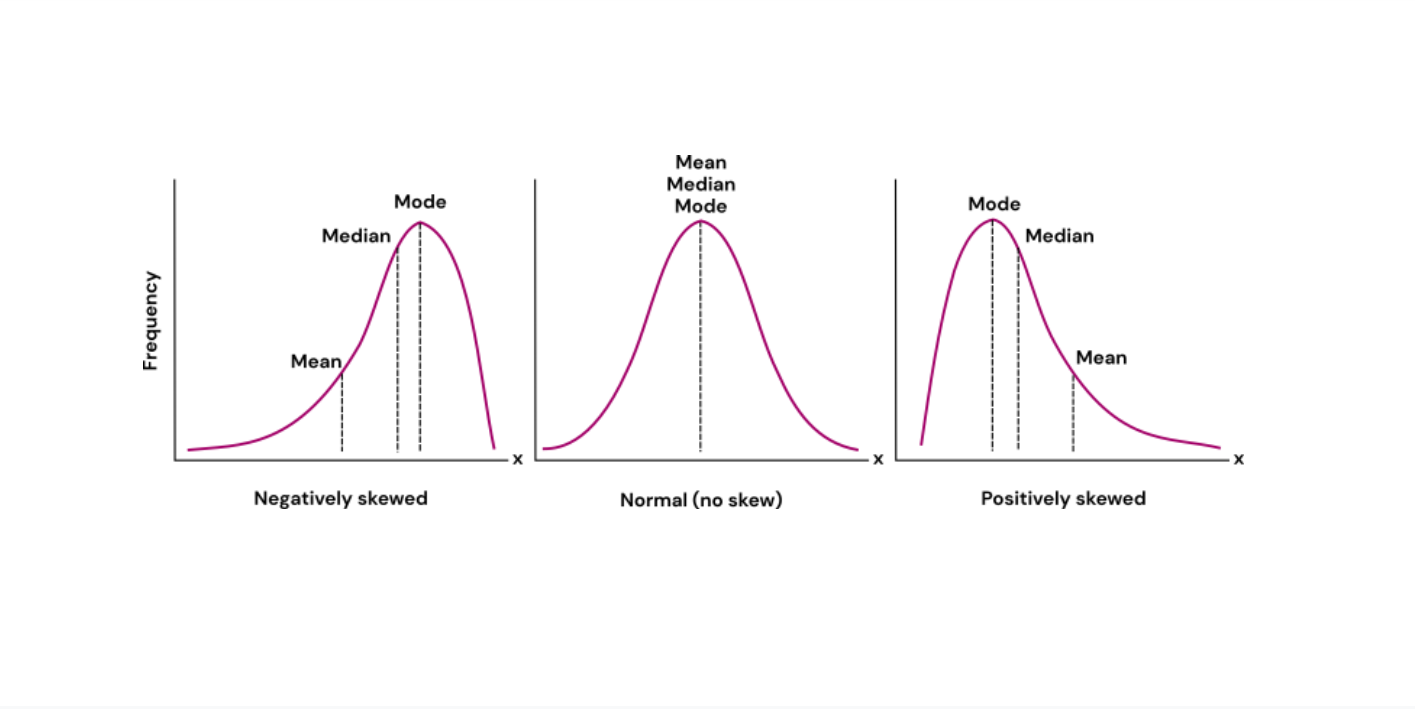

### 📈 Step 3: Explore Feature Distributions and Relationships

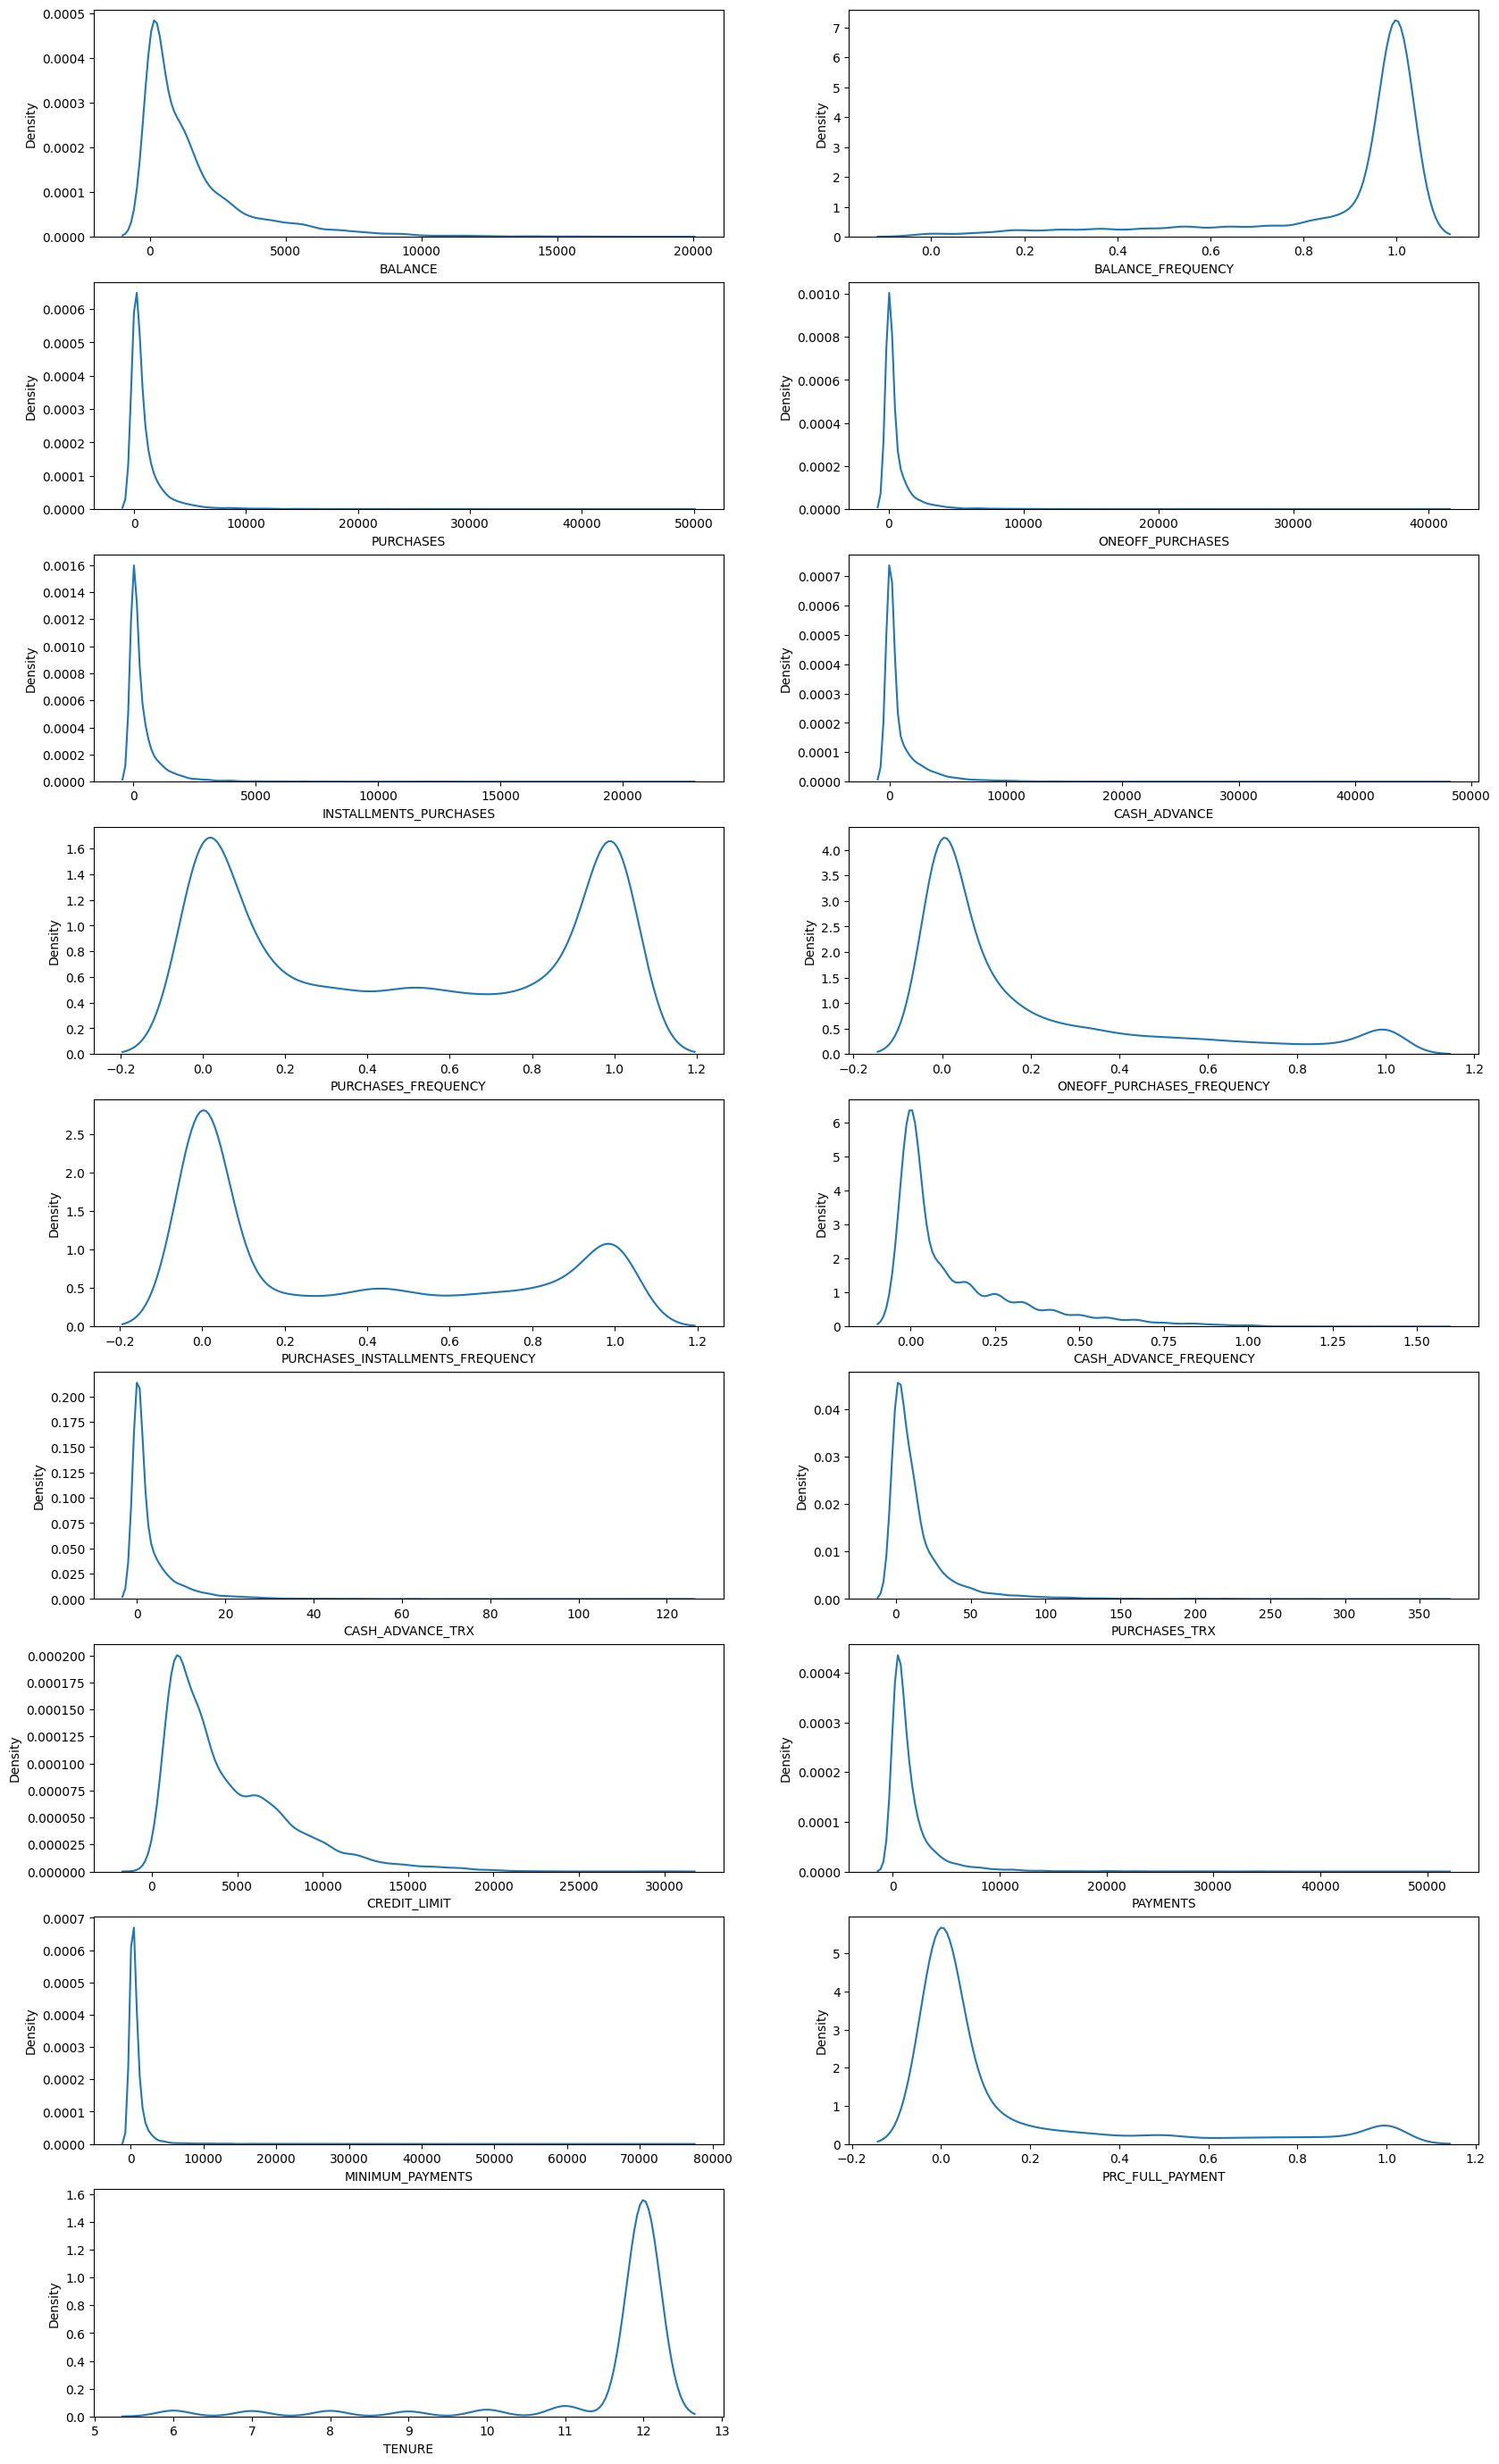

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)

plt.show()

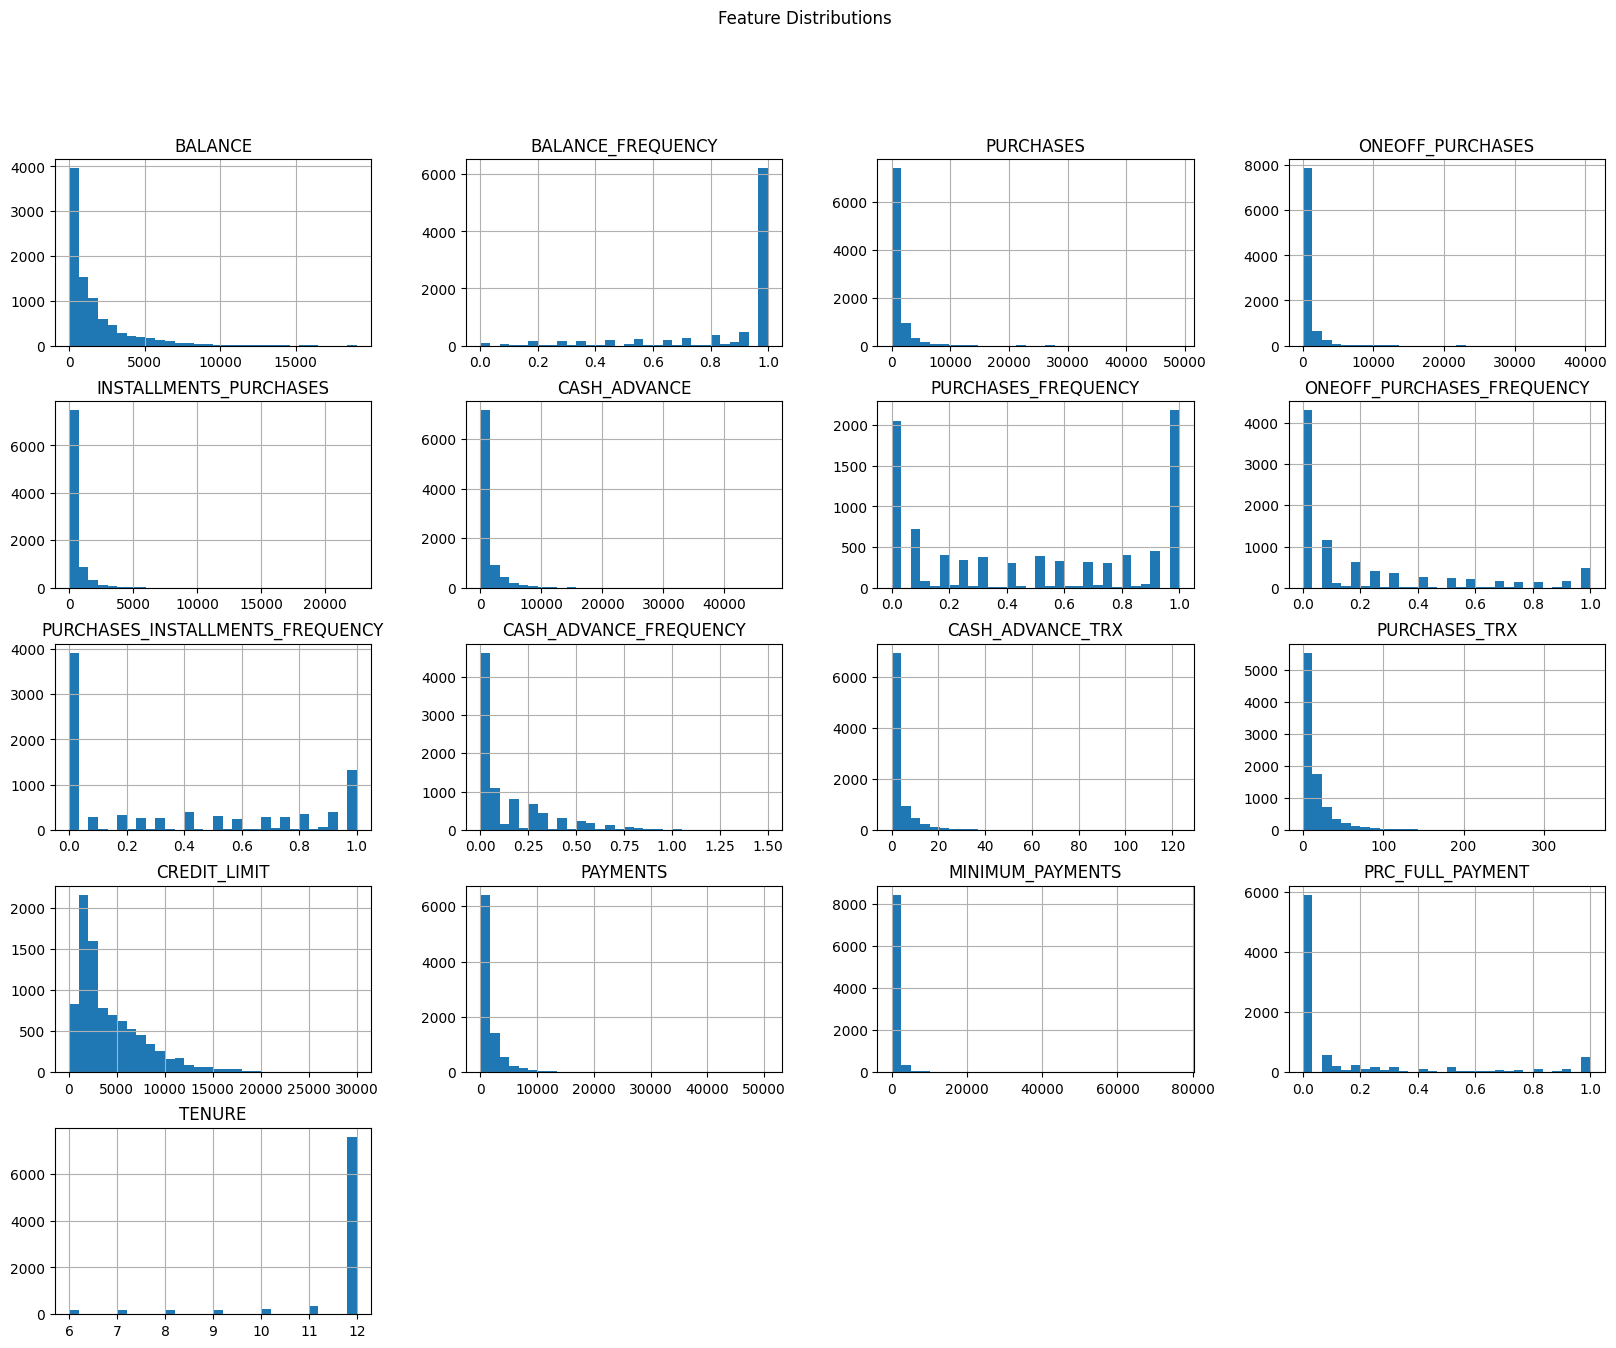

In [13]:
# Pairplot to visualize relationships
df.hist(figsize=(20, 15), bins = 30)
plt.suptitle("Feature Distributions")
plt.show()

## 😬 Woah! That's a Lot of Skewness

Upon closer inspection of the dataset, it's clear that **many features are heavily skewed**, and the degree of skewness varies from one feature to another. But honestly, this isn't too surprising. In datasets involving financial transactions, there are always a **few customers with extremely high activity**, which tends to pull the distribution out of shape.

## 🤔 Should We Handle the Skewness?

That really depends on the **goal of the clustering**:

- 🔍 **If we're doing anomaly detection**, we *don't* want to remove outliers or reduce skewness. These rare cases are exactly what we want the model to find and group --- they could represent fraud, VIP customers, or unusual behavior.

- 📈 **For our current application**, however, the focus is on **understanding customer behavior through good visualizations** and **meaningful cluster formation**. In this context, **handling skewness is actually helpful**, as it:

  - Makes the data more symmetrical,

  - Reduces the dominance of outliers in distance-based algorithms like K-Means,

  - And enables the clustering algorithm to form tighter and more interpretable clusters.

## 🧪 Our Plan

To address this, we will apply appropriate transformations (such as **logarithmic scaling**) to reduce skewness. This will help us:

- Improve the **quality of the clusters**,

- Enhance **visualization clarity**, and

- Ultimately provide **better insights** for marketing strategies.

Let's move forward with **skewness treatment and scaling** to prepare the data for clustering! 🚀

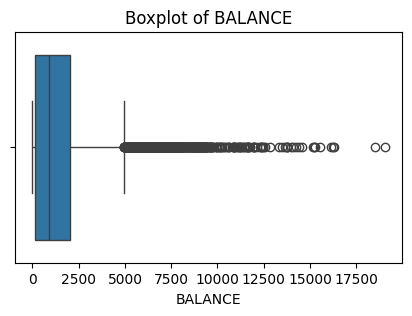

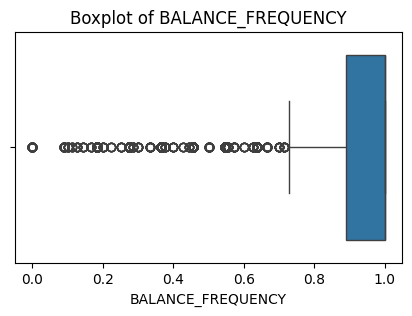

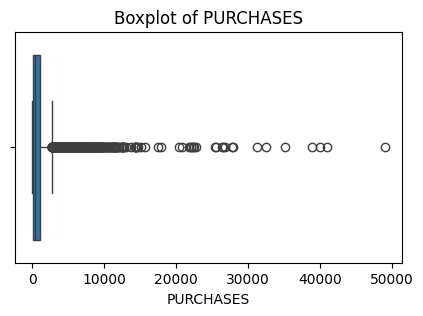

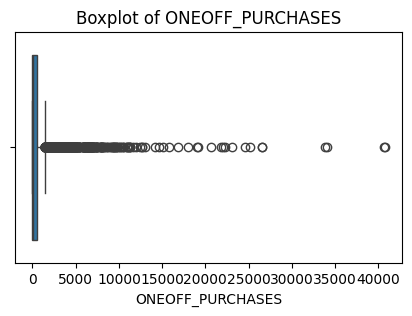

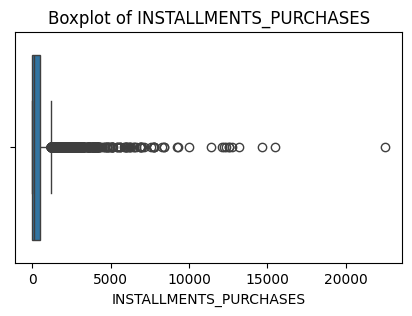

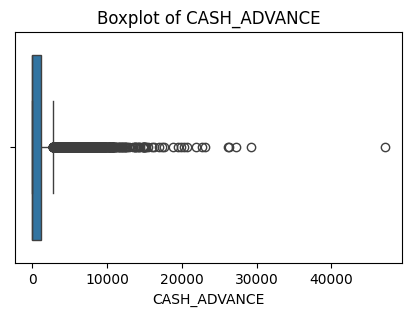

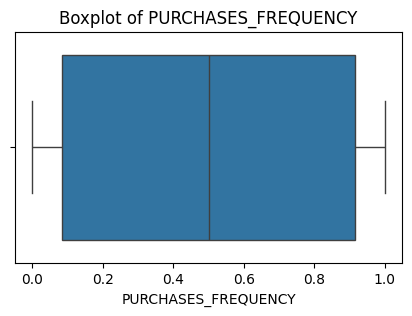

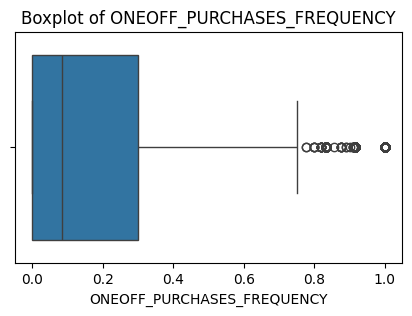

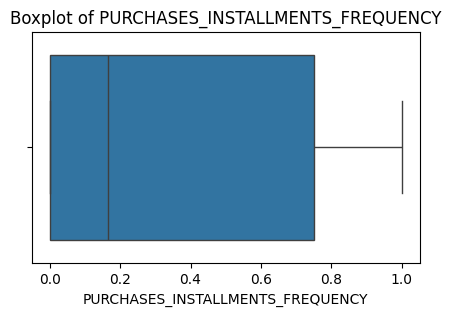

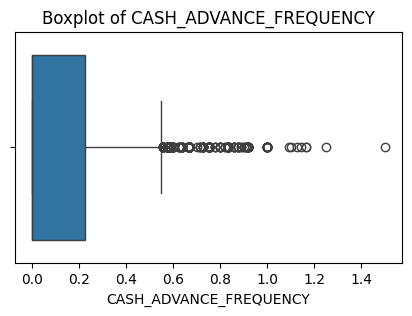

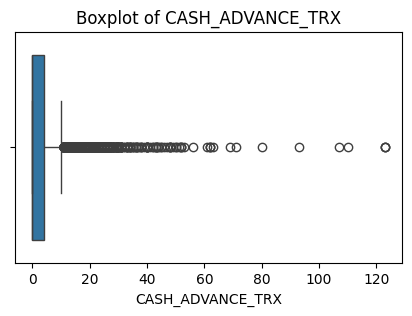

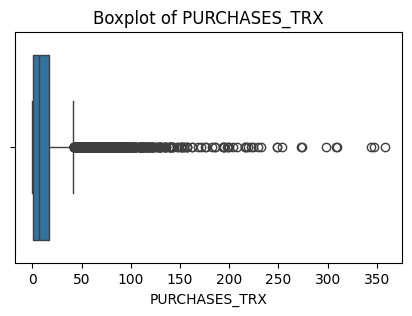

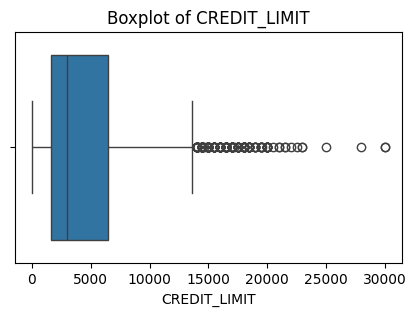

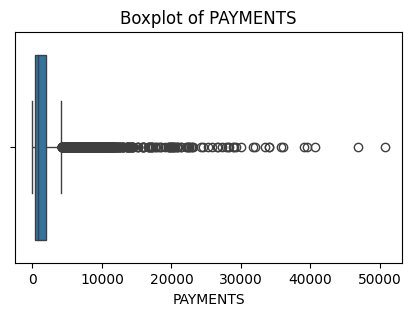

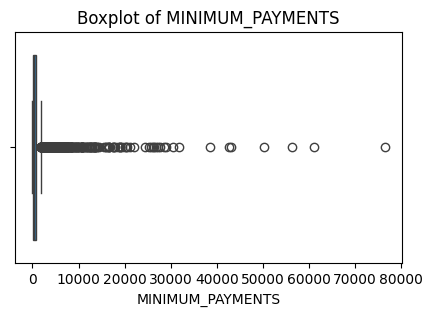

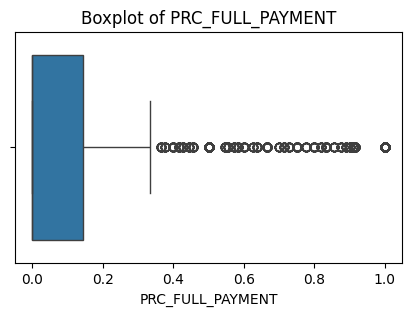

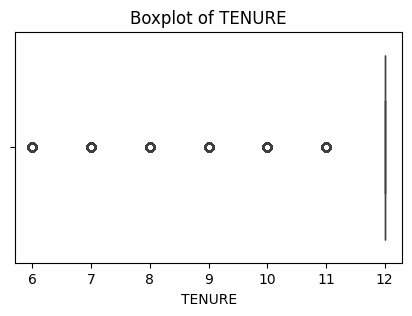

In [14]:
for col in df.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## 🔧 Let's See If We Can Fix This Skewness

Now that we've identified the presence of skewness in several features, it's time to take action! 🛠️

As mentioned earlier, reducing skewness can improve the performance of clustering algorithms --- especially those that rely on distance calculations like K-Means. It can also help us generate cleaner and more interpretable visualizations.

One common technique to reduce skewness is applying a **logarithmic transformation**. This compresses the range of high values while preserving the relative differences between records.

### ✨ Log Transformation + Scaling

Let's apply the `np.log1p()` transformation (which safely handles zero values) followed by **standard scaling** to bring all features to the same scale:

In [15]:
import numpy as np
from sklearn.preprocessing import StandardScaler
# Log1p transformation to reduce skewness
df_log = np.log1p(df)

# Standard scaling
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_log)

# Convert back to DataFrame for easier handling
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

df_log.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  3.735304           0.597837   4.568506          0.000000   
1  8.071989           0.646627   0.000000          0.000000   
2  7.822504           0.693147   6.651791          6.651791   
3  7.419183           0.492477   7.313220          7.313220   
4  6.707735           0.693147   2.833213          2.833213   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                4.568506      0.000000             0.154151   
1                0.000000      8.770896             0.000000   
2                0.000000      0.000000             0.693147   
3                0.000000      5.331694             0.080042   
4                0.000000      0.000000             0.080042   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.080042   
1                    0.000000                          0.000000   
2                    0.693147                          0.000000   
3                    0.080042                          0.000000   
4                    0.080042                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000          0.000000       1.098612      6.908755   
1                0.223144          1.609438       0.000000      8.853808   
2                0.000000          0.000000       2.564949      8.922792   
3                0.080042          0.693147       0.693147      8.922792   
4                0.000000          0.000000       0.693147      7.090910   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0  5.312231          4.945277          0.000000  2.564949  
1  8.319725          6.978531          0.200671  2.564949  
2  6.434654          6.442994          0.000000  2.564949  
3  0.000000          6.762968          0.000000  2.564949  
4  6.521114          5.504483          0.000000  2.564949

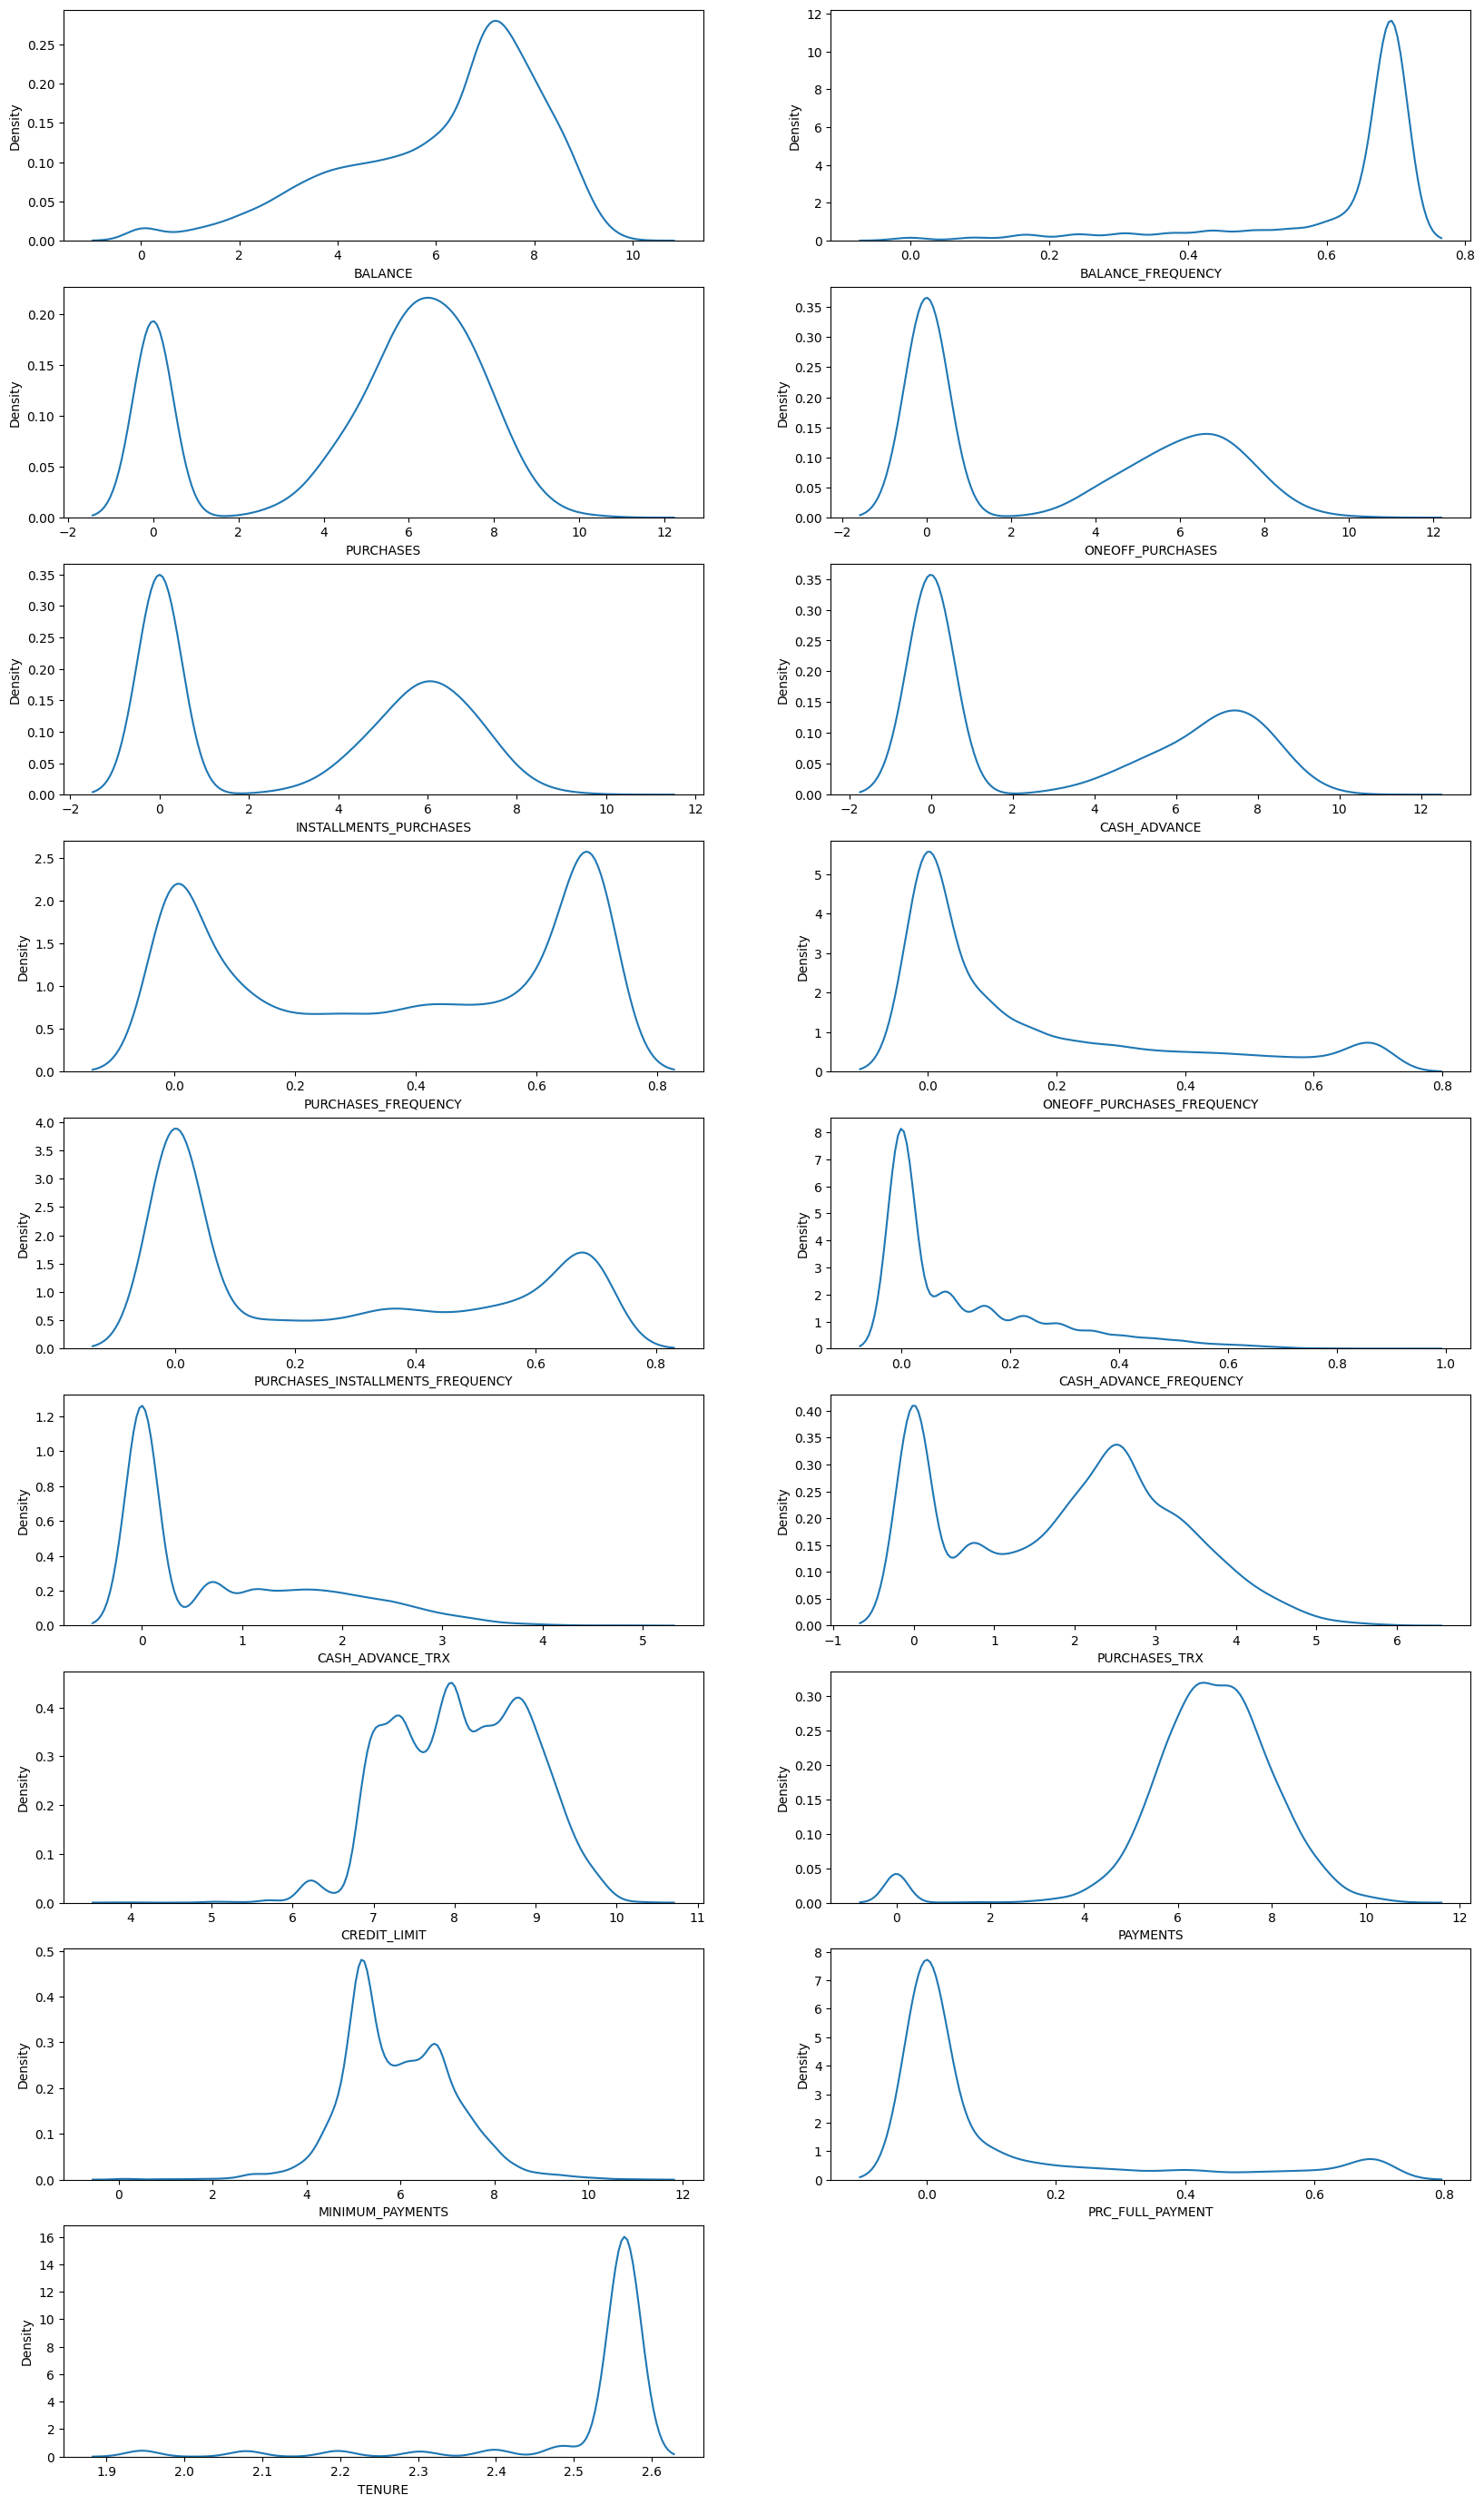

In [16]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df_log.columns):
    if df_log[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df_log[col], ax=ax)
        plt.xlabel(col)

plt.show()

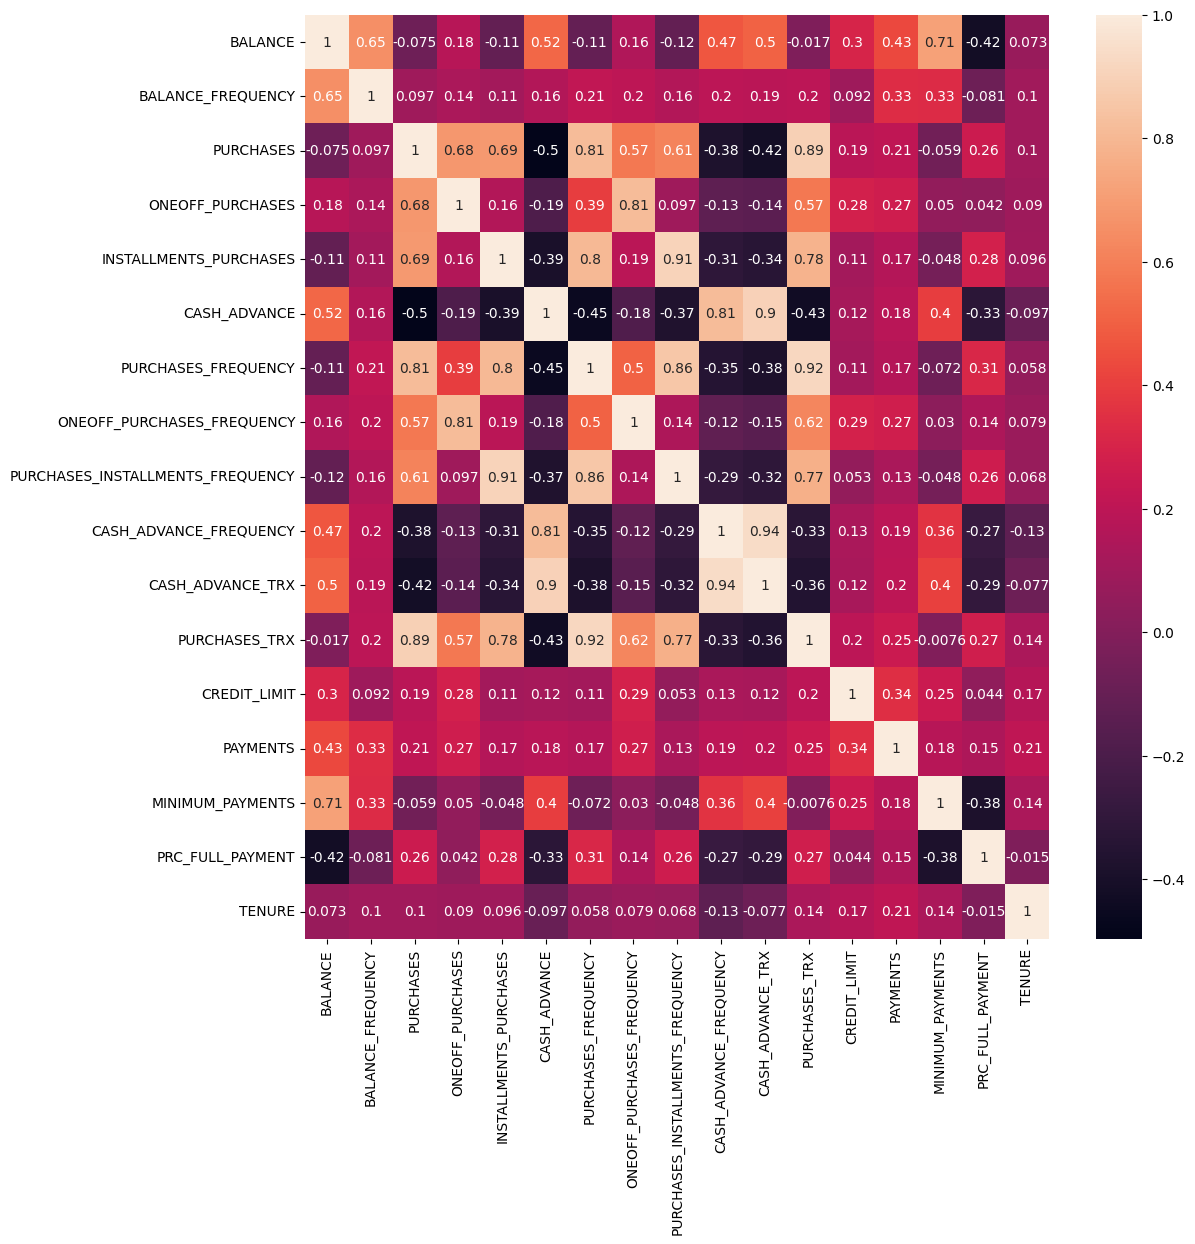

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df_log.corr(), annot=True)
plt.show()

## 🧠 Tackling Correlation with Dimensionality Reduction

As we explore the dataset further, we notice that **several features are highly correlated**. This is expected in customer behavior data --- for example, total purchases and number of purchase transactions are likely to be related.

While some clustering algorithms can tolerate correlated features, **high correlation can distort distance-based algorithms** (like K-Means) by giving more weight to certain patterns.

### 🧩 Why Dimensionality Reduction?

There are several ways to handle correlated features:

- Dropping redundant features manually,

- Using feature selection techniques,

- Or using **dimensionality reduction** methods to compress the data into a smaller set of uncorrelated features.

👉 For this project, we'll go with **Principal Component Analysis (PCA)** to reduce the dataset's dimensionality while retaining as much **variance (information)** as possible.

## 📉 What is PCA?

**Principal Component Analysis (PCA)** is a statistical technique that:

- Finds new axes (called **principal components**) for the dataset,

- These new axes are **linear combinations** of the original features,

- The **first principal component** captures the direction of **maximum variance** in the data,

- The **second component** is orthogonal (perpendicular) to the first and captures the next most variance, and so on.

> ✨ This allows us to reduce the dataset into a smaller number of **uncorrelated components** while preserving the patterns in the data.

---

Let's apply PCA to our preprocessed data and check how many components we need to explain most of the variance. 🧪

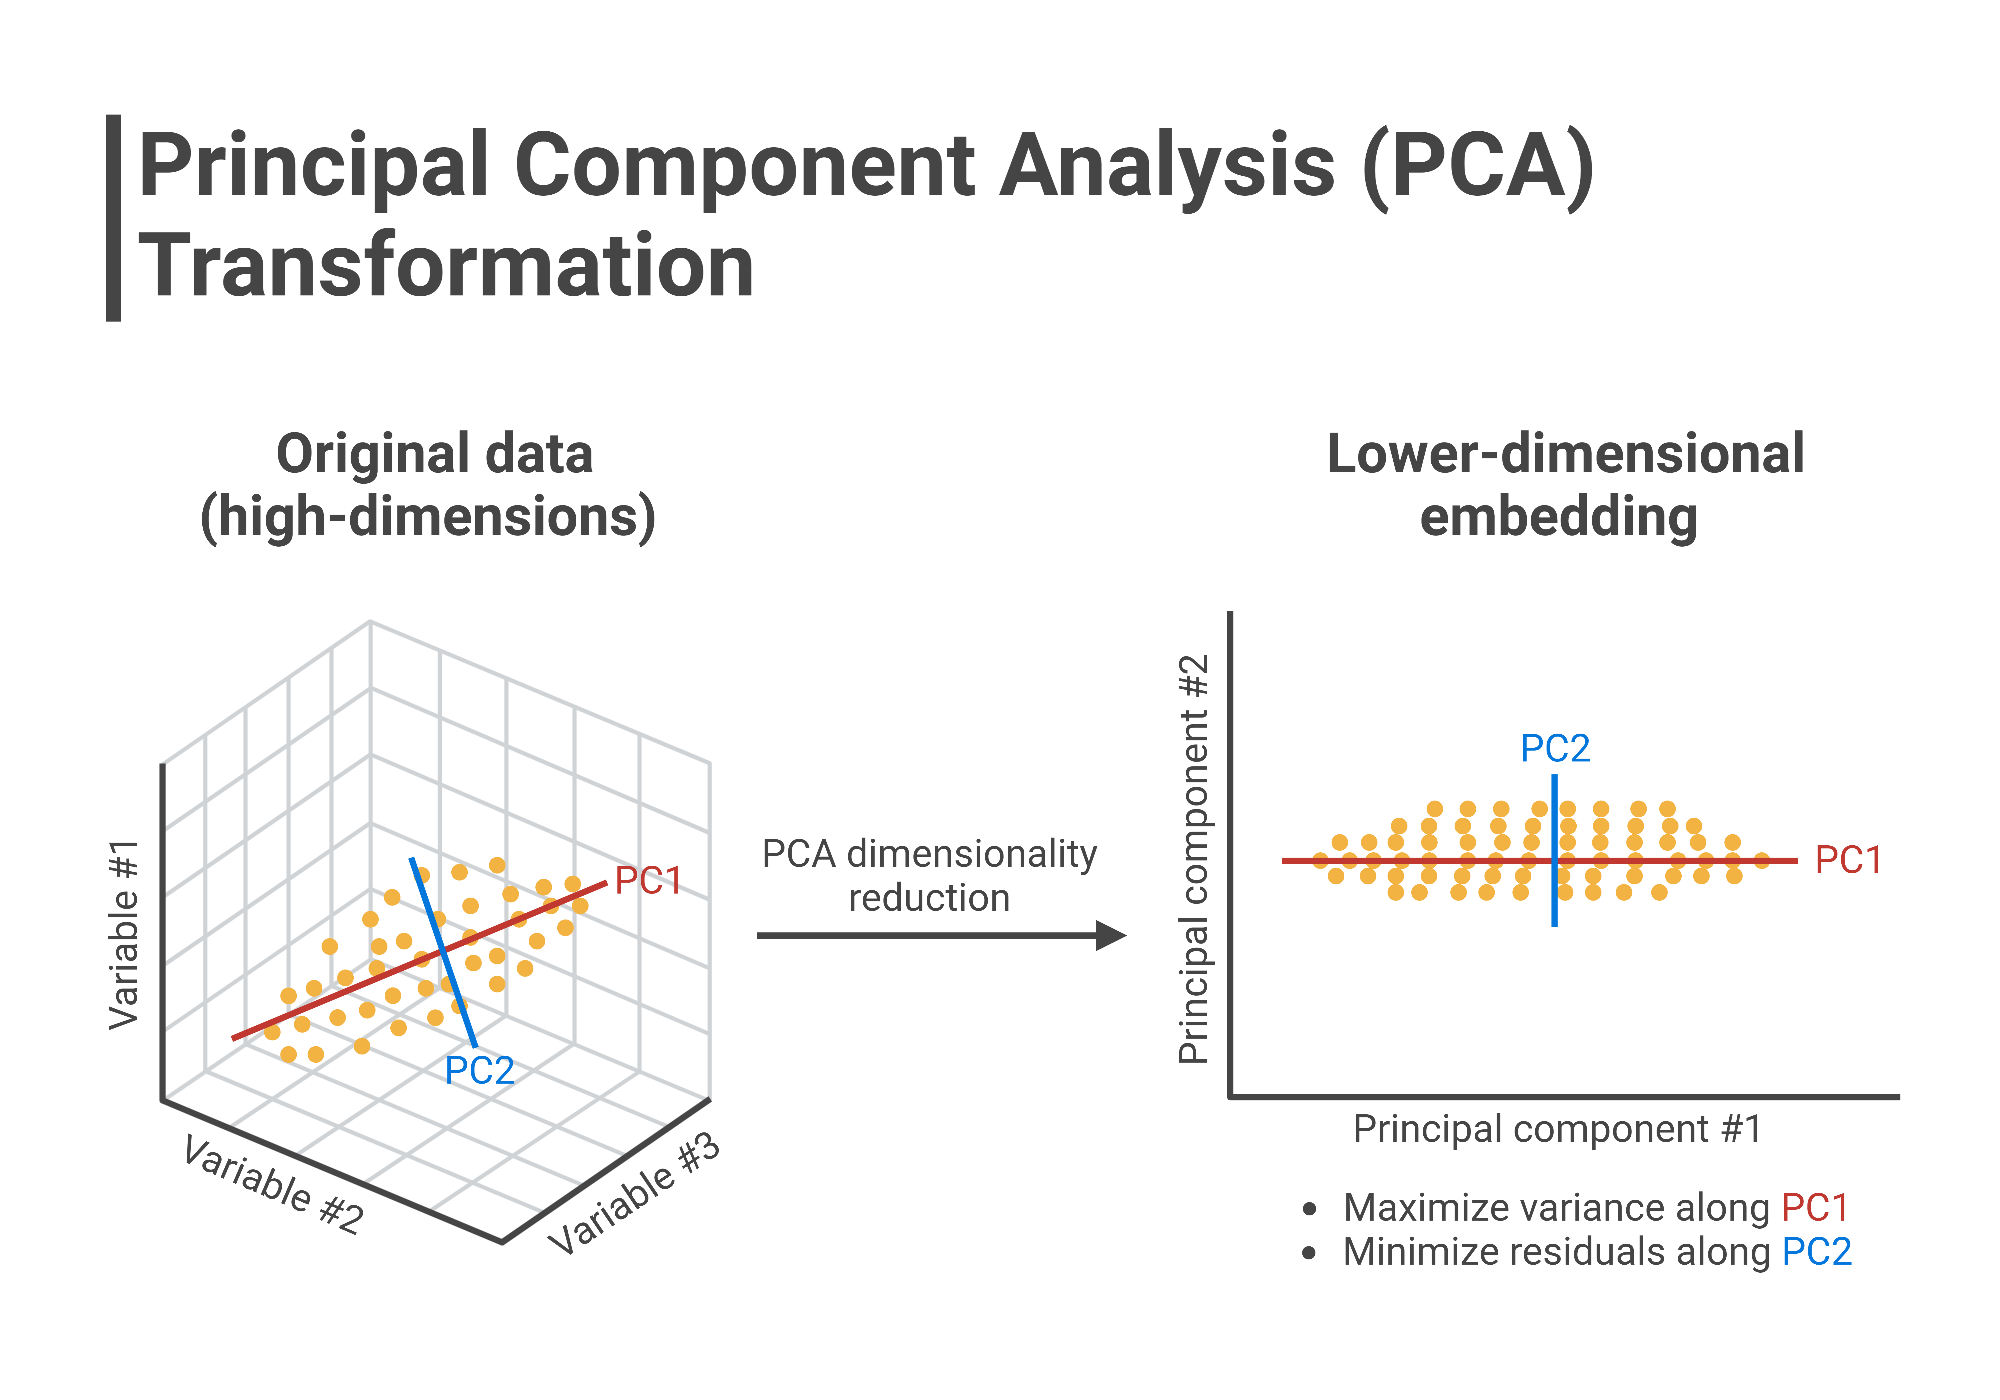

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_red = pca.fit_transform(df_log)

## 🧠 Model Training: K-Means Clustering

Now that we've preprocessed and reduced the dimensionality of our dataset, it's time to train our model! 🎯

We'll use the **K-Means clustering algorithm**, which is a simple yet powerful **unsupervised learning** technique that helps group similar records into distinct clusters.

---

### 🤖 What is K-Means Clustering?

**K-Means** is an iterative clustering algorithm that groups data into **K clusters** based on feature similarity. It's particularly effective for finding natural groupings in unlabeled data.

This algorithm aims to **minimize the variance within each cluster** and maximize the variance **between clusters**.

---

### 🔍 How Does K-Means Work?

Let's walk through the process step-by-step:

1\. **Choose the number of clusters** `K`.

2\. **Randomly initialize** `K` points as cluster centroids (these don't need to be actual data points).

3\. **Assign each data point** to the **nearest centroid**, forming `K` clusters.

4\. **Recalculate centroids** by computing the **mean of all data points** in each cluster.

5\. **Reassign data points** to the nearest centroid based on updated positions.

6\. **Repeat steps 4 and 5** until:

   - No reassignment happens (convergence), or

   - A maximum number of iterations is reached.

---

### 📦 What Do We Get?

After the training is complete, we obtain:

- `K` clusters representing distinct customer groups.

- Each customer assigned to one of the clusters.

- Cluster centroids that summarize the typical behavior of each group.

This output can then be used for:

- 📊 Visualization,

- 🎯 Targeted marketing,

- 🔍 Customer behavior analysis,

- ⚠️ Detecting unusual behavior.

---

Next, we'll determine the optimal number of clusters `K` using the **Elbow Method**. Stay tuned! 🧮

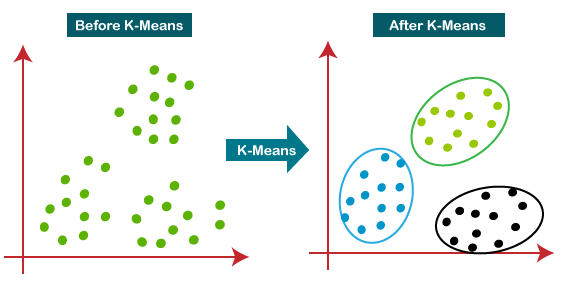

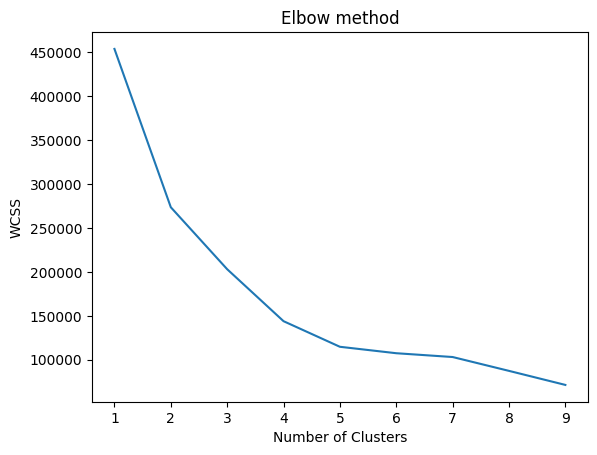

In [19]:
from sklearn.cluster import KMeans

kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(X_red) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## 🔍 Choosing the Optimal Number of Clusters

After applying the **Elbow Method**, we plot the **within-cluster sum of squares (WCSS)** against different values of `K` to find the "elbow point" --- the point after which adding more clusters doesn't significantly reduce the WCSS.

### 📉 The Elbow Method

When we plotted the WCSS values, we observed something interesting:

> 💡 **"Do you see the elbow?"**

> It looks like the bend happens at around **3 or 4 clusters** --- this is typically where the rate of WCSS reduction sharply slows down.

But the Elbow Method can sometimes be a bit **subjective**. So to support our decision, we'll also use the **Silhouette Score**.

---

## 📏 Silhouette Score for Validation

The **Silhouette Score** helps us measure how well each point fits into its assigned cluster, compared to other clusters.

- It ranges from **-1 to 1**, where:

  - **+1** indicates the point is well-matched to its own cluster and poorly matched to neighboring clusters,

  - **0** means the point lies on the boundary between two clusters,

  - **-1** means the point may have been assigned to the wrong cluster.

> 📊 A higher average Silhouette Score means **better-defined clusters**.

We'll compute the Silhouette Score for both **K = 3** and **K = 4** to help us choose the most appropriate number of clusters for our data.

Let's move on to the code and compare their performances! 🧪

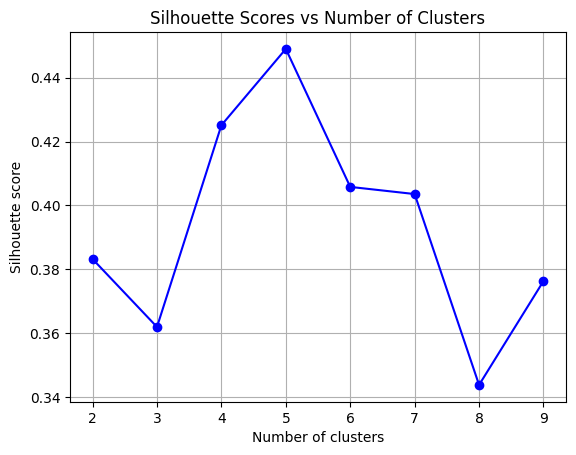

In [20]:
from sklearn.metrics import silhouette_score

# Use models for k = 2 to 9 (indices 1 to 8 in kmeans_models)
k_values = list(range(2, 10))  # k = 2 to 9
silhouette_scores = [silhouette_score(X_red, model.labels_) for model in kmeans_models[1:9]]

plt.plot(k_values, silhouette_scores, "bo-")
plt.xticks(k_values)
plt.title('Silhouette Scores vs Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()


## 🤷‍♂️ Well, We Were Wrong...

Initially, based on the Elbow Method, we guessed that the ideal number of clusters might be **3 or 4**. But after calculating the **Silhouette Scores**, we discovered something surprising:

> 📈 **K = 4** gave us the **Decent Score**, outperforming both 2 and 3 clusters!

This means the data forms two **well-defined and distinct clusters**, and anything beyond that starts to blend the boundaries or create weakly defined groups.

---

## ✅ Final Decision: K = 4

Even though it wasn't what we initially expected, we'll go with **K = 4** as the optimal number of clusters --- because that's what the data is telling us 📊

This gives us:

- Two clearly separated groups of customers,

- Higher confidence in our cluster quality,

- A simpler yet effective segmentation for further analysis.

Let's move forward with training our **final K-Means model with `n_clusters=4`** and start analyzing the customer groups we've discovered! 🚀

In [21]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=23)
kmeans.fit(X_red)

print('Silhoutte score of our model is ' + str(silhouette_score(X_red, kmeans.labels_)))

Silhoutte score of our model is 0.42510269445150245


In [22]:
df['cluster_id'] = kmeans.labels_

## 🔄 Inverse Transforming the Data for Interpretation

After clustering, it's important to bring the data back to its **original scale** so we can interpret the characteristics of each cluster in real-world terms 💡.

Since we applied both:

1\. **Logarithmic transformation (`log1p`)**, and

2\. **Standard scaling (z-score normalization)**,

we now need to **reverse** these steps in the correct order:

### 🪜 Steps to Inverse Transform:

1\. **Inverse scale** using `StandardScaler.inverse_transform()`,

2\. **Apply `expm1()`** to reverse `log1p()` and get the original values.

Here's how we can do that:

In [23]:
# Step 1: Inverse transform the standard scaling
df_unscaled = scaler.inverse_transform(df_log)

# Step 2: Reverse the log1p transformation
df_original = np.expm1(df_log)

# Convert back to DataFrame for better readability
df_original = pd.DataFrame(df_original, columns=df_log.columns)

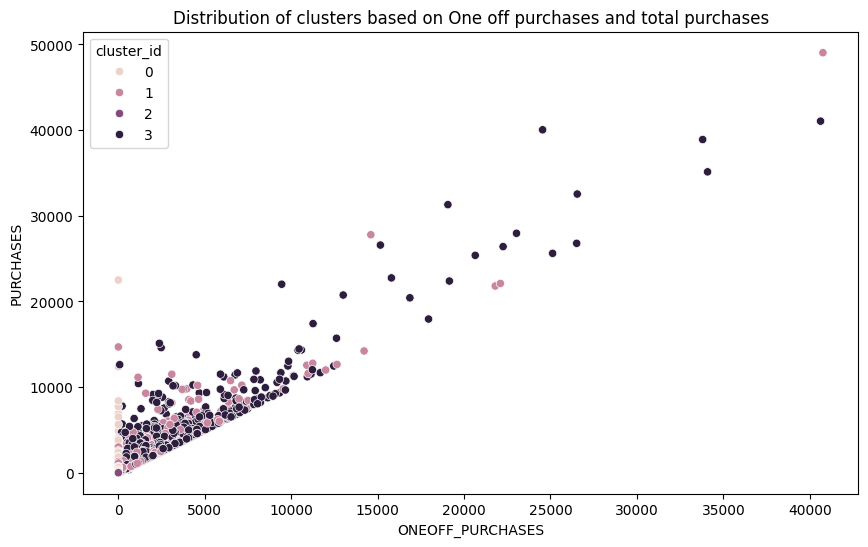

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on One off purchases and total purchases')
plt.show()

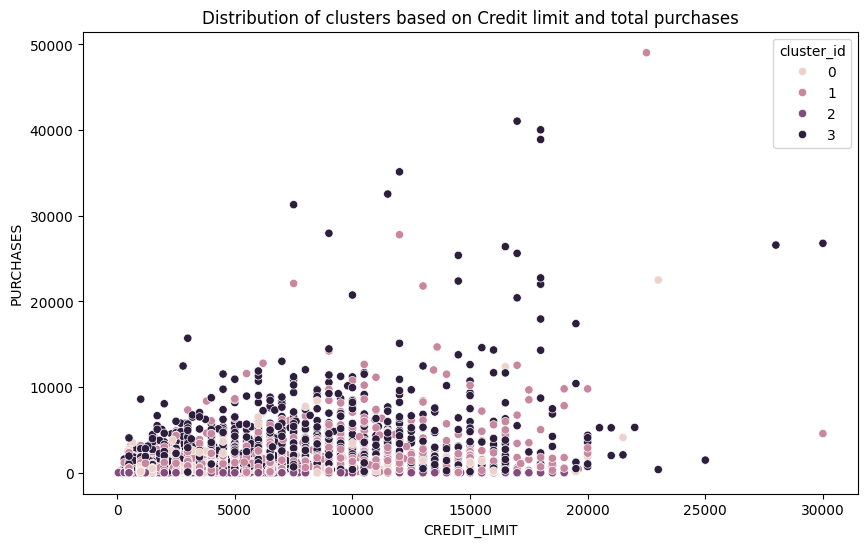

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

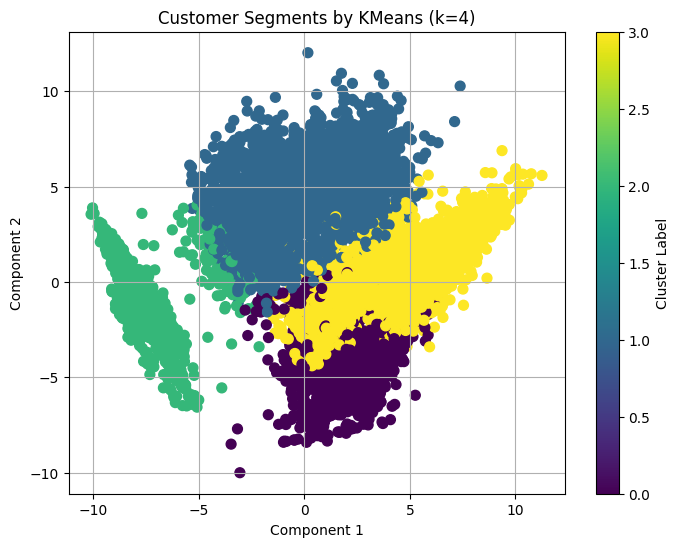

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_red[:, 0], X_red[:, 1], c=kmeans.labels_, cmap='viridis', s=50)
plt.title('Customer Segments by KMeans (k=4)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()


In [27]:
# Create a DataFrame for clusters, using the scaled data from df_scaled
df_clusters = pd.DataFrame(df_scaled, columns=df.columns)  # Using df.columns as feature names
df_clusters['Cluster'] = kmeans.labels_



In [28]:
cluster_profile = df_clusters.groupby('Cluster').mean()
display(cluster_profile)


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                             
0       -0.962882          -0.403858   0.265356         -0.924726   
1        0.640658           0.325502   0.537895          0.570573   
2        0.407276           0.028597  -1.626466         -0.955640   
3       -0.105365           0.024296   0.675515          0.986070   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                      0.727626     -0.884465             0.523425   
1                      0.190252      1.044933             0.288164   
2                     -1.068962      0.983212            -1.282769   
3                      0.167176     -0.917082             0.408249   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                                                 
0                         -0.703796                          0.753451   
1                          0.338587                          0.132011   
2                         -0.717935                         -0.950089   
3                          0.815195                          0.099385   

         CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  \
Cluster                                                            
0                     -0.697206         -0.778649       0.262571   
1                      0.856558          0.959050       0.407175   
2                      0.735790          0.818979      -1.348828   
3                     -0.716956         -0.800379       0.558785   

         CREDIT_LIMIT  PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  \
Cluster                                                                         
0           -0.395746 -0.481537         -0.506140          0.492719 -0.021163   
1            0.228540  0.334832          0.532559         -0.330785 -0.042334   
2           -0.140091 -0.060327          0.240118         -0.383039 -0.135572   
3            0.223430  0.142966         -0.223221          0.192755  0.153236   

         cluster_id  
Cluster              
0               NaN  
1               NaN  
2               NaN  
3               NaN

<ipython-input-29-d13a797f5932>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df_clusters, palette='viridis')


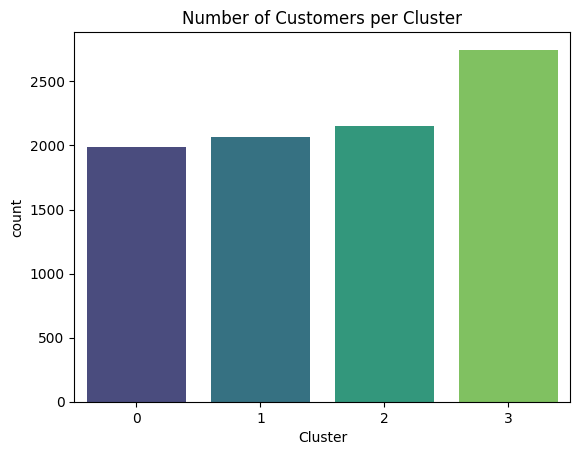

In [29]:
sns.countplot(x='Cluster', data=df_clusters, palette='viridis')
plt.title('Number of Customers per Cluster')
plt.show()


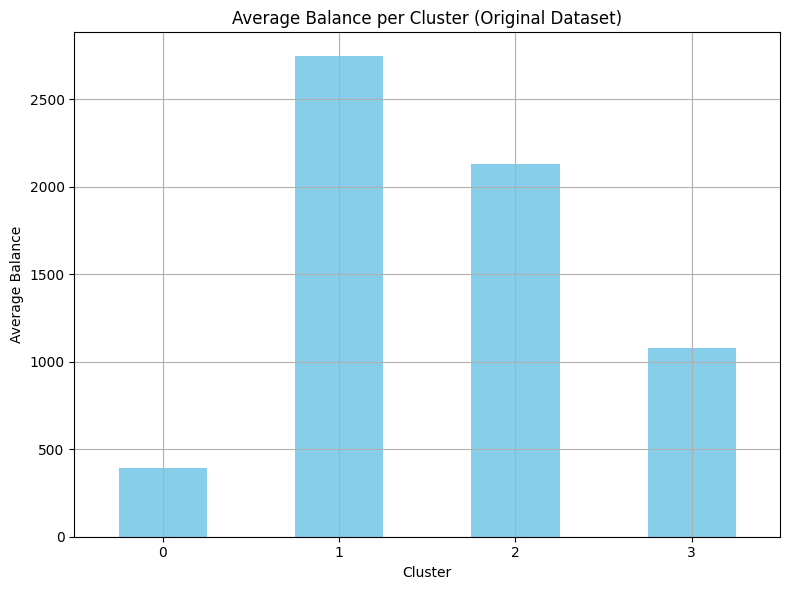

In [30]:
import matplotlib.pyplot as plt

# Add the cluster labels from k-means to the original dataset
df['Cluster'] = kmeans.labels_

# Group by cluster and calculate the mean for the 'BALANCE' feature
avg_balance = df.groupby('Cluster')['BALANCE'].mean()

# Plot the average balance per cluster
plt.figure(figsize=(8, 6))
avg_balance.plot(kind='bar', color='skyblue')
plt.title('Average Balance per Cluster (Original Dataset)')
plt.xlabel('Cluster')
plt.ylabel('Average Balance')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig('Average Balance per Cluster (Original Dataset).png')

# Show the plot
plt.show()


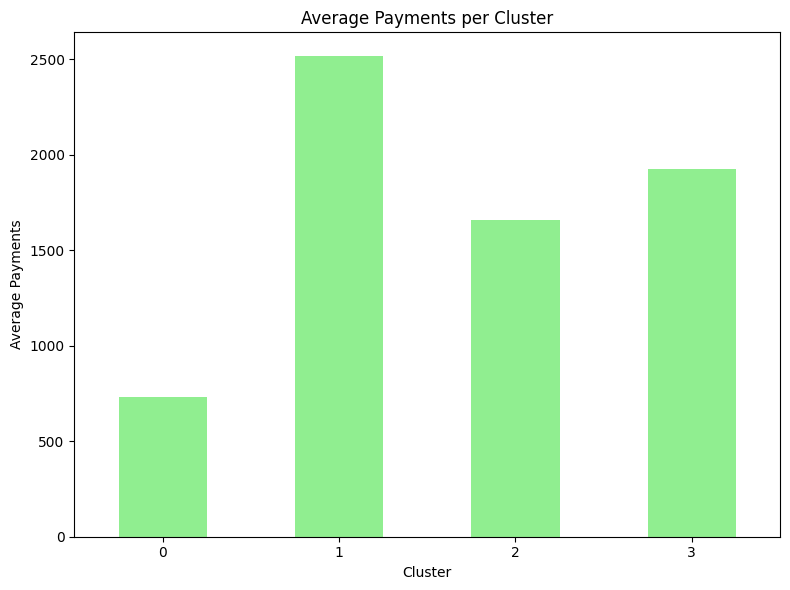

In [31]:
# Group by cluster and calculate the mean for 'PAYMENTS'
avg_payments = df.groupby('Cluster')['PAYMENTS'].mean()

# Plot the average payments per cluster
plt.figure(figsize=(8, 6))
avg_payments.plot(kind='bar', color='lightgreen')
plt.title('Average Payments per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


### 📌 Clustering Approach: From K-Means to GMM

After applying **K-Means clustering** to our credit card dataset, we evaluated the model using the **Silhouette Score**, which gave a reasonable indication of cluster separation. However, when we visualized the customer segments using the **first two principal components (PCA)**, the clusters appeared to be somewhat **overlapping and irregular in shape**.

This observation suggests that the underlying structure of the data might not be well captured by the **spherical cluster assumption** that K-Means makes. Therefore, to potentially achieve a more flexible and accurate segmentation, we decided to experiment with **Gaussian Mixture Models (GMM)**, which allow for **elliptical cluster shapes** and incorporate **soft probabilistic assignments** of points to clusters.

By moving to GMM, our goal is to better capture the natural structure of the data and improve clustering quality, especially in cases where customer behavior doesn't cluster into well-separated spheres.


In [32]:
from sklearn.mixture import GaussianMixture

# GMM clustering
gmm = GaussianMixture(n_components=4, random_state=23)
gmm_labels = gmm.fit_predict(X_red)

# Silhouette score for GMM
gmm_silhouette = silhouette_score(X_red, gmm_labels)
print(f'Silhouette score for GMM: {gmm_silhouette}')


Silhouette score for GMM: 0.4124078363661472


### 📊 Comparing GMM and K-Means: Silhouette Score vs Visualization

After evaluating both **K-Means** and **Gaussian Mixture Models (GMM)**, we found that the **Silhouette Score** for K-Means was slightly higher at **0.42**, compared to **0.41** for GMM. However, when we visualized the customer segments using **PCA components**, the **GMM** model appeared to provide **better-defined clusters**, with clearer separation between customer segments.

Even though the Silhouette Score is almost identical, the **visualization** of the clusters suggests that GMM offers a more nuanced understanding of customer behavior. The **elliptical shape** of the clusters in GMM, compared to the **spherical nature** assumed by K-Means, seems to align better with the data's structure, which justifies our preference for GMM in this case.


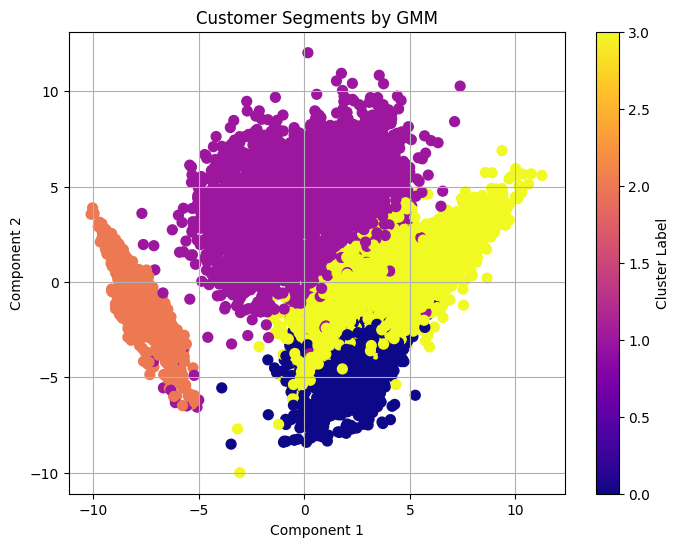

In [33]:
plt.figure(figsize=(8, 6))
plt.scatter(X_red[:, 0], X_red[:, 1], c=gmm_labels, cmap='plasma', s=50)
plt.title('Customer Segments by GMM')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [34]:
df['Cluster'] = gmm_labels

<ipython-input-35-344aa92385a7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=df, palette='viridis')


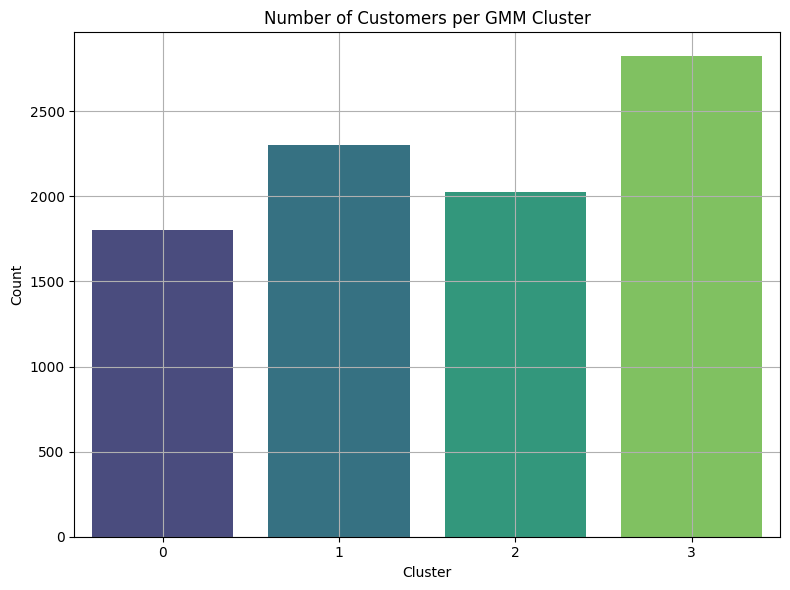

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.title('Number of Customers per GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


### 📊 **1\. Average Balance per GMM Cluster**

From the first plot:

-   **Cluster 1** has the **highest average balance** (~2600), indicating customers in this cluster tend to **maintain a high credit balance**.

-   **Cluster 2** also maintains a **high balance**, though slightly lower (~2200), suggesting another group of financially active users.

-   **Cluster 3** shows a **moderate balance** (~1050), possibly mid-level users.

-   **Cluster 0** has the **lowest average balance** (~400), which may represent users who either pay off their balances frequently or have low credit utilization.

👉 **Insight**:\
Clusters 1 and 2 might represent **financially strong or high-credit-usage customers**, while Cluster 0 may represent **low-usage or highly disciplined payers**.

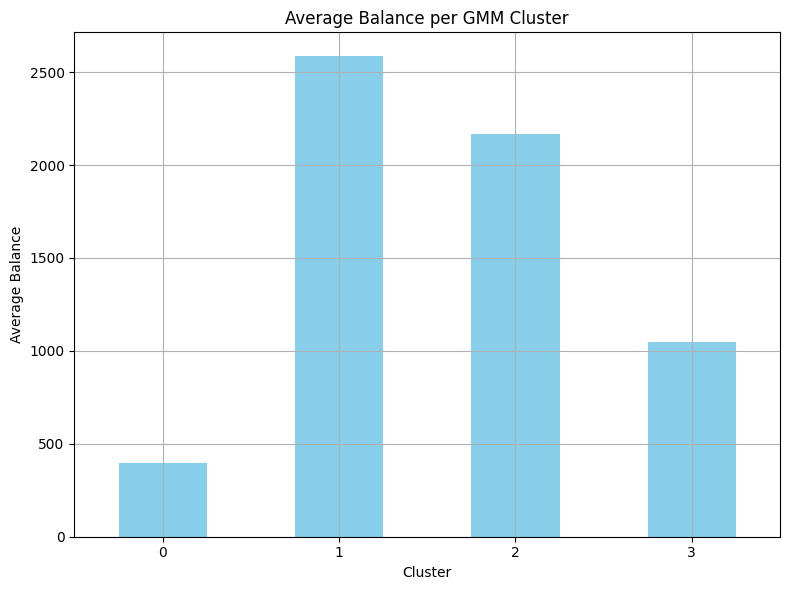

In [36]:
avg_balance = df.groupby('Cluster')['BALANCE'].mean()

plt.figure(figsize=(8, 6))
avg_balance.plot(kind='bar', color='skyblue')
plt.title('Average Balance per GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Balance')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.savefig('Average Balance per GMM Cluster.png')
plt.show()


### 💰 **2\. Average Payments per GMM Cluster**

From the second plot:

-   **Cluster 1** again has the **highest average payments** (~2400), consistent with their high balance --- they not only spend more but also **repay larger amounts**, indicating **responsible high-volume usage**.

-   **Cluster 3** makes **moderate-high payments** (~1850), which may indicate they are relatively active in using and repaying credit.

-   **Cluster 2** makes slightly **lower payments** (~1650), which could mean they **maintain high balances without repaying as much**, possibly revolving users.

-   **Cluster 0** again has the **lowest average payments** (~750), reinforcing the idea of **low engagement** with the credit system or **small transactions**.

👉 **Insight**:\
Cluster 1 is likely the most **financially active and responsible segment**, while Cluster 0 may be a group of **low-usage or low-income** customers.

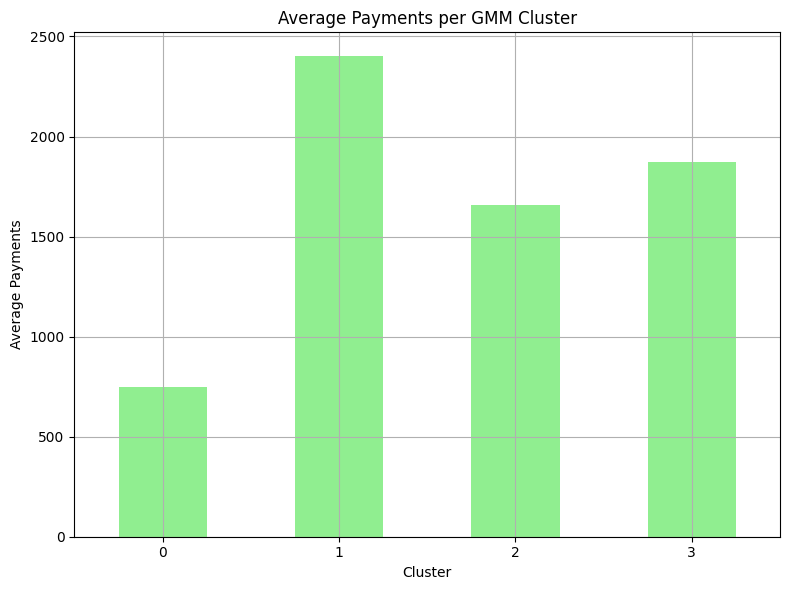

In [37]:
avg_payments = df.groupby('Cluster')['PAYMENTS'].mean()

plt.figure(figsize=(8, 6))
avg_payments.plot(kind='bar', color='lightgreen')
plt.title('Average Payments per GMM Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Payments')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()


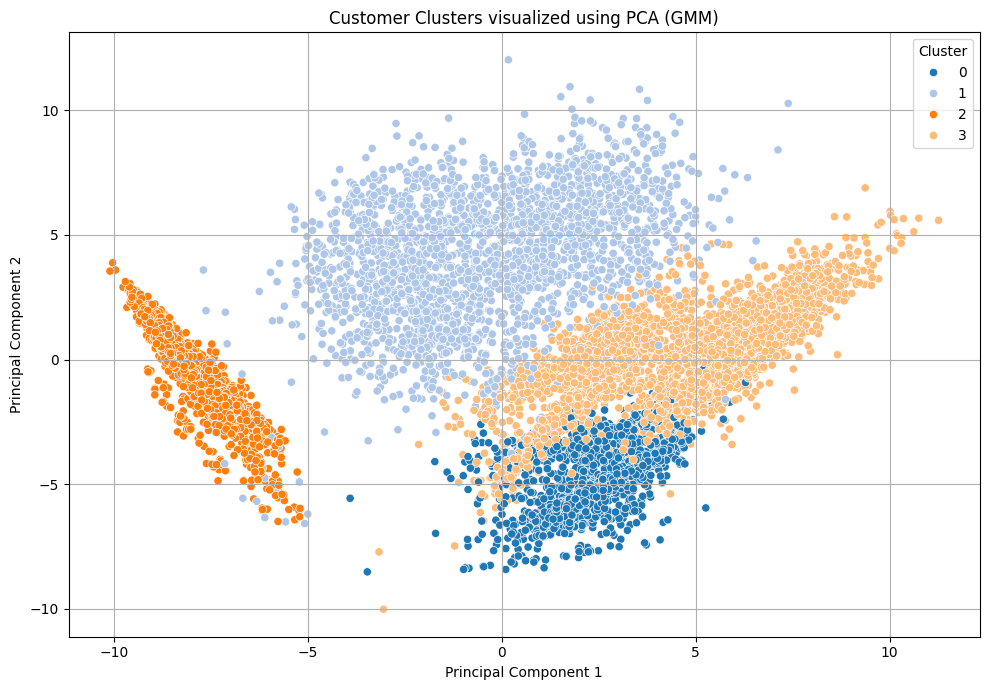

In [38]:
# Create DataFrame with only first 2 PCA components
df_pca = pd.DataFrame(X_red[:, :2], columns=['PCA 1', 'PCA 2'])

# Add GMM labels
df_pca['Cluster'] = gmm_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA 1', y='PCA 2', hue='Cluster', data=df_pca, palette='tab20', legend='full')
plt.title('Customer Clusters visualized using PCA (GMM)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()


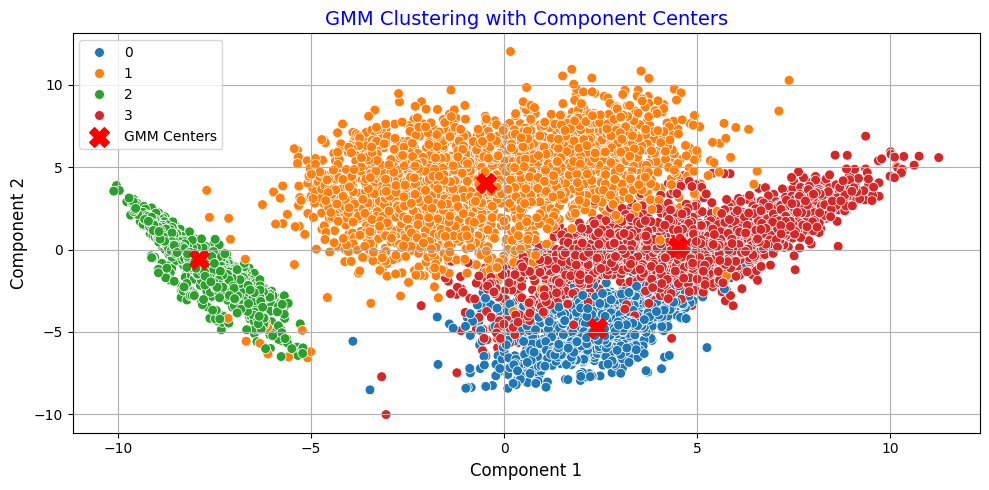

In [39]:
# Step 1: Create DataFrame for 2D PCA space
new_df = pd.DataFrame(X_red[:, :2], columns=['component_1', 'component_2'])
new_df['label'] = gmm_labels

# Step 2: Plot the clusters and GMM means
plt.figure(figsize=(10, 5))

# Scatter plot of GMM-assigned clusters
sns.scatterplot(x='component_1', y='component_2', hue='label', data=new_df, palette='tab10', s=50)

# Plot GMM component means (centers)
gmm_centers = gmm.means_[:, :2]  # Only the first two components
plt.scatter(gmm_centers[:, 0], gmm_centers[:, 1], s=200, c='red', marker='X', label='GMM Centers')

# Plot styling
plt.title('GMM Clustering with Component Centers', fontsize=14, color='b')
plt.xlabel("Component 1", fontsize=12)
plt.ylabel("Component 2", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 📈 **Insights from One-off vs Total Purchases by GMM Cluster**

#### **1\. Cluster 3 (Red) -- High Spenders**

-   **Heavily concentrated in the upper-right region** of the plot.

-   These customers make **very high one-off purchases**, and their **total purchases are also high**.

-   Likely represents **premium or luxury buyers** who make large transactions infrequently.

-   Could benefit from **exclusive offers**, **rewards programs**, or **high-limit credit cards**.

#### **2\. Cluster 1 (Orange) -- Moderate One-off Spenders**

-   Present across a **wide range of total purchases**, but with **moderate one-off spending**.

-   This group is more **balanced**, possibly showing **frequent smaller one-off purchases**.

-   Targeting this group with **installment plans** or **cashback offers** could increase engagement.

#### **3\. Cluster 0 (Blue) -- Low-Activity Users**

-   Concentrated near the **bottom-left corner**, with **low one-off purchases and low total purchases**.

-   Likely represent **infrequent users** or **low-income customers**.

-   Strategies here could involve **educational campaigns**, **usage incentives**, or **credit building offers**.

#### **4\. Cluster 2 (Green) -- Minimal Spend**

-   Very few points, suggesting it's a **small segment**.

-   Positioned extremely low on both axes --- might be **inactive accounts**, **new users**, or **highly frugal customers**.

-   Consider investigating if this cluster has **limited tenure** or **credit limit constraints**.

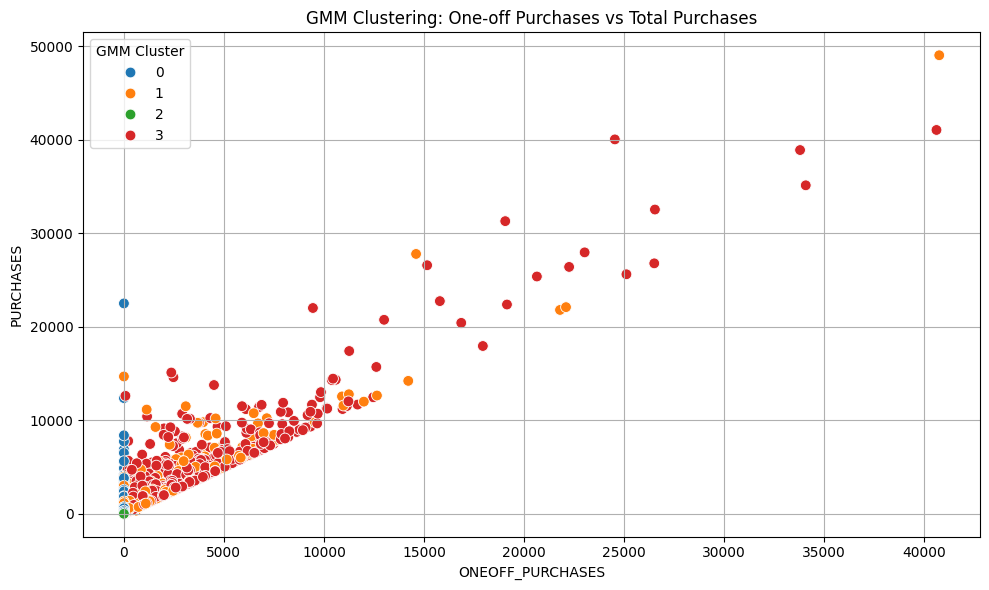

In [40]:
# Step 1: Assign GMM labels to the original DataFrame
df['cluster_id'] = gmm_labels  # or 'GMM_Cluster' if you want to keep it separate

# Step 2: Plot One-off Purchases vs. Total Purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ONEOFF_PURCHASES', y='PURCHASES', hue='cluster_id', palette='tab10', s=60)

plt.title('GMM Clustering: One-off Purchases vs Total Purchases')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.legend(title='GMM Cluster')
plt.tight_layout()
plt.show()


### 📊 Insight: GMM Clustering -- Credit Limit vs Total Purchases

This scatter plot visualizes **GMM clustering** based on two key features: `CREDIT_LIMIT` (x-axis) and `PURCHASES` (y-axis). Each point represents a customer, and color indicates the cluster assigned by the Gaussian Mixture Model.

#### 🧠 Key Observations:

1.  **Distinct Spending Segments**:

    -   **Cluster 3 (red)** contains many high spenders --- customers with **significantly higher purchases** and **moderate to high credit limits**. These are likely **premium or high-value customers**.

    -   **Cluster 0 (blue)** shows a **small number of customers with both high credit limits and low-to-moderate purchases**, which may suggest **underutilization** of credit.

2.  **Low Usage Group**:

    -   **Cluster 2 (green)** primarily consists of customers with **low purchases and low credit limits**. These could be **new users, low-income groups, or inactive customers**.

3.  **Average Customers**:

    -   **Cluster 1 (orange)** represents the majority and shows a balanced trend: **moderate purchases** with **medium-range credit limits**. These might be your **typical or average users**.

4.  **Anomalies**:

    -   There are **a few outliers** with exceptionally high purchases (e.g., over 40,000), most belonging to Cluster 3. These can be investigated for **special offers, loyalty programs, or risk monitoring**.

* * * * *

### 💡 Business Implications:

-   **Cluster 3 (High Spenders)**:

    -   Focused loyalty programs, cashback offers, and premium services can enhance engagement and retention.

-   **Cluster 2 (Low Engagement)**:

    -   Consider personalized marketing or promotions to activate this segment.

-   **Cluster 0 (Underutilized Credit)**:

    -   Potential for upselling or cross-selling; may also indicate risk-averse users or customers with unused capacity.

-   **Cluster 1 (Stable Core)**:

    -   Maintain satisfaction with general benefits and monitor for upward movement to Cluster 3.

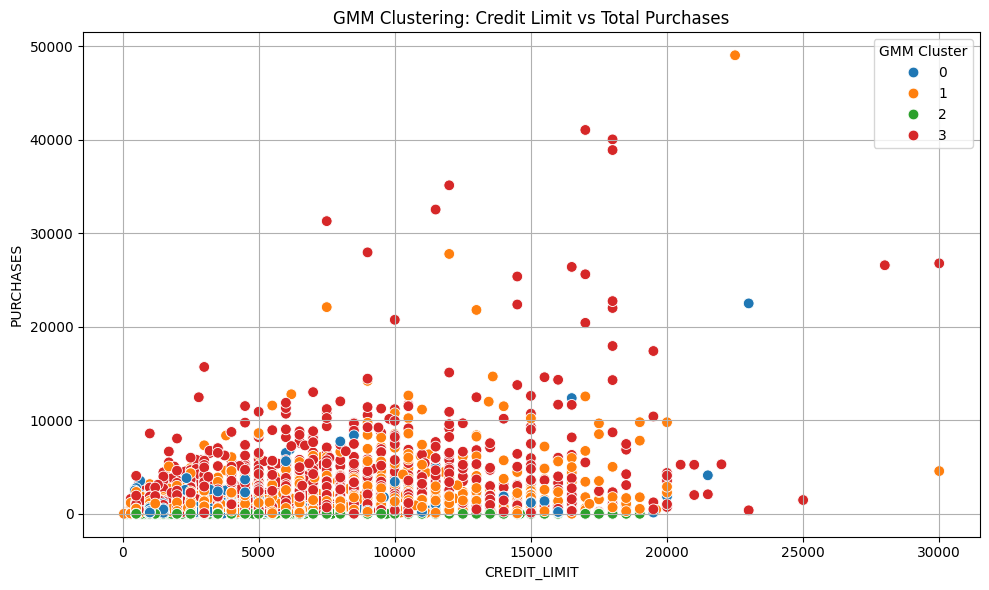

In [41]:
# df['cluster_id'] = gmm_labels  # already done in previous step

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='CREDIT_LIMIT',
    y='PURCHASES',
    hue='cluster_id',
    palette='tab10',
    s=60
)

plt.title('GMM Clustering: Credit Limit vs Total Purchases')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.legend(title='GMM Cluster')
plt.tight_layout()
plt.show()


### 📊 Insight: GMM Clustering -- Balance vs Credit Limit

This scatter plot shows the **distribution of customers based on their account balance and credit limit**, colored by their GMM cluster labels.

#### 🧠 Key Observations:

1.  **Strong Positive Correlation**:

    -   There is a **general positive trend**---as **credit limit increases, balance tends to increase**. This is intuitive: users with more credit tend to carry higher balances.

2.  **Cluster Distribution**:

    -   **Cluster 1 (orange)** is the **most dense**, covering a wide range of balances and credit limits. These likely represent **average, mainstream customers**.

    -   **Cluster 2 (green)** includes customers with **moderate balances and mid-range credit limits**, possibly **responsible spenders** who maintain control over their credit.

    -   **Cluster 3 (red)** includes many **low-balance customers with very high credit limits**, which could indicate **wealthy but cautious users**, or possibly **inactive users with large credit limits**.

    -   **Cluster 0 (blue)** shows some spread but appears less distinct. They might represent **a niche group** with behavior not dominated by balance or credit limit.

3.  **Interesting Cases**:

    -   Some **customers with very low balances and extremely high credit limits** (Cluster 3) could be **dormant high-value clients**---ideal targets for **re-engagement marketing**.

    -   A few users in **Cluster 1 or 2 have balances close to their credit limits**, potentially indicating **credit stress or risk**.

* * * * *

### 💼 Business Takeaways:

-   **Cluster 1 (Average Users)**:

    -   Retain and maintain---offer credit management tools and track credit utilization trends.

-   **Cluster 2 (Balanced Users)**:

    -   Could be upsold with loyalty programs or financial products like loans.

-   **Cluster 3 (High Credit, Low Balance)**:

    -   Explore **targeted usage incentives**, like cashback or promotional offers to increase engagement.

-   **Cluster 0 (Outliers or Specialists)**:


#1. Balance vs. Credit Limit

######**Purpose**: To understand the relationship between users' available balance and their credit limits across different clusters.

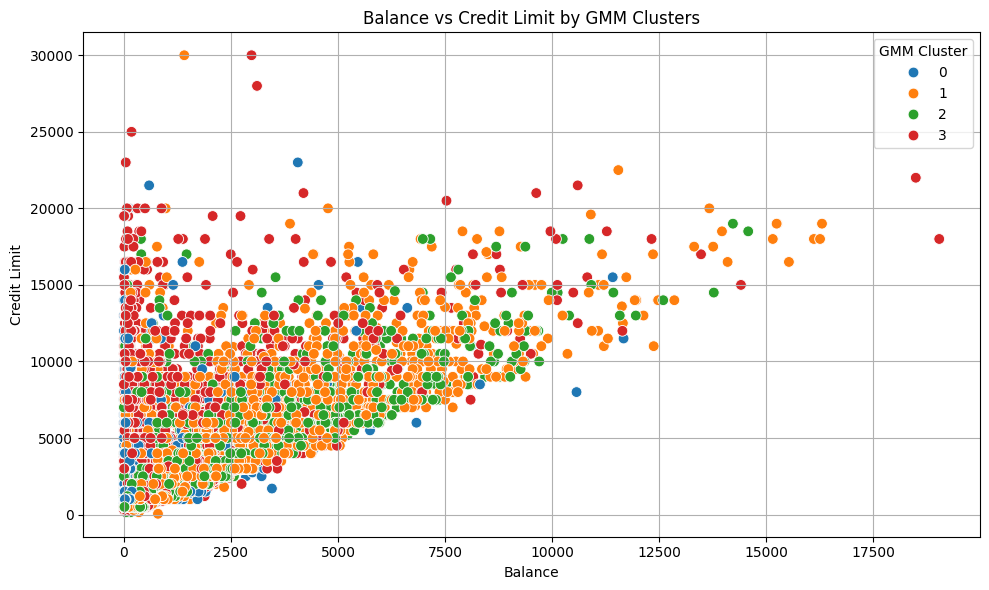

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='BALANCE',
    y='CREDIT_LIMIT',
    hue='cluster_id',
    palette='tab10',
    s=60
)

plt.title('Balance vs Credit Limit by GMM Clusters')
plt.xlabel('Balance')
plt.ylabel('Credit Limit')
plt.grid(True)
plt.legend(title='GMM Cluster')
plt.tight_layout()
plt.show()

Insights from "Cash Advance vs Total Purchases by GMM Clusters"
===============================================================

1.  **Cluster 0**: Likely represents customers with moderate purchases and low cash advances

2.  **Cluster 1**: May show customers with high purchases but minimal cash advances (responsible spenders)

3.  **Cluster 2**: Could indicate customers with low purchases but high cash advances (possibly cash-reliant)

4.  **Cluster 3**: Might represent customers with both high purchases and high cash advances (high-credit users)

#2. Cash Advance vs. Purchases
######**Purpose**: To explore how users in each cluster behave when it comes to cash advances versus total purchases.

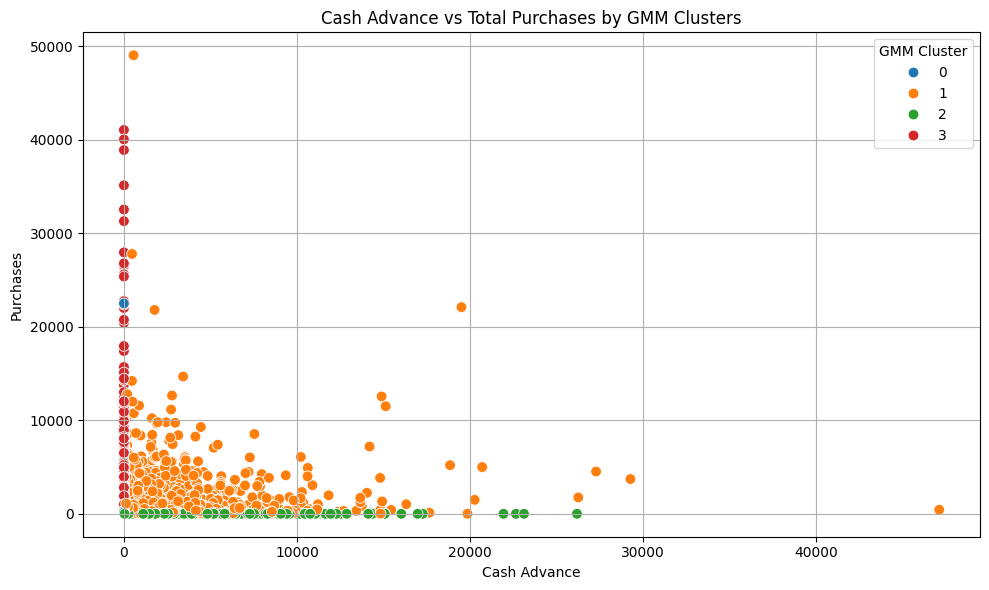

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='CASH_ADVANCE',
    y='PURCHASES',
    hue='cluster_id',
    palette='tab10',
    s=60
)

plt.title('Cash Advance vs Total Purchases by GMM Clusters')
plt.xlabel('Cash Advance')
plt.ylabel('Purchases')
plt.grid(True)
plt.legend(title='GMM Cluster')
plt.tight_layout()
plt.show()

#3. Payments vs. Minimum Payments

**Purpose**: To examine how users are handling payments compared to their minimum payment due, which could reveal different customer behaviors (e.g., making only the minimum payment vs paying more).

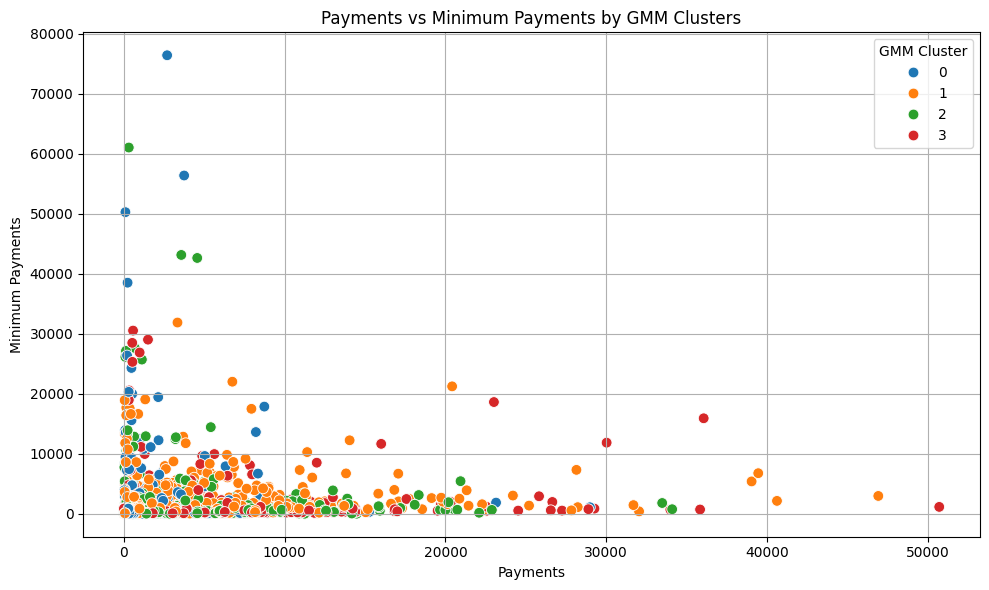

In [44]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='PAYMENTS',
    y='MINIMUM_PAYMENTS',
    hue='cluster_id',
    palette='tab10',
    s=60
)

plt.title('Payments vs Minimum Payments by GMM Clusters')
plt.xlabel('Payments')
plt.ylabel('Minimum Payments')
plt.grid(True)
plt.legend(title='GMM Cluster')
plt.tight_layout()
plt.show()


#4. One-off Purchases vs Installment Purchases

**Purpose**: To analyze the relationship between one-off purchases and installment purchases. This can provide insights into customers who prefer paying in full vs those who tend to buy in installments.

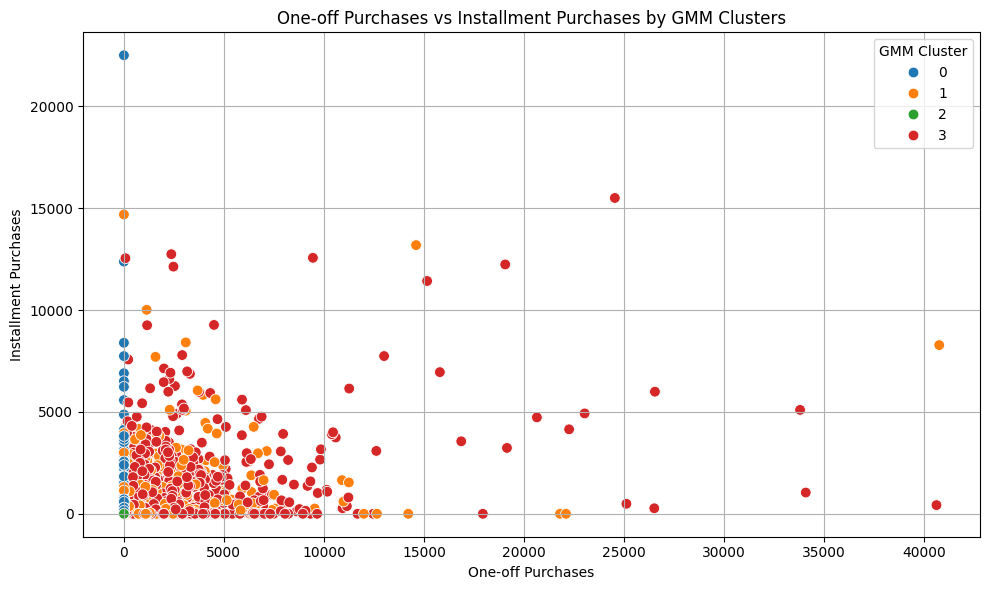

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='ONEOFF_PURCHASES',
    y='INSTALLMENTS_PURCHASES',
    hue='cluster_id',
    palette='tab10',
    s=60
)

plt.title('One-off Purchases vs Installment Purchases by GMM Clusters')
plt.xlabel('One-off Purchases')
plt.ylabel('Installment Purchases')
plt.grid(True)
plt.legend(title='GMM Cluster')
plt.tight_layout()
plt.show()


## 📊 Final GMM Cluster Segments & Descriptions

---

### 🔵 Cluster 0 — **Low Users**

* 💡 **Profile:** Very low balance, low spending, and low payments.
* 🧾 **Behavior:** Minimal credit activity; possibly new users, low-income, or inactive customers.
* 🎯 **Strategy:** Encourage engagement with incentives, credit education, or starter offers.

---

### 🟠 Cluster 1 — **High Users**

* 💡 **Profile:** Highest average balance and payments among all clusters.
* 🧾 **Behavior:** Highly active and financially responsible — they use credit often and repay consistently.
* 🎯 **Strategy:** Reward loyalty with premium offers, increase credit limits, and offer value-added services.

---

### 🟢 Cluster 2 — **Heavy Holders**

* 💡 **Profile:** High balances but relatively lower payments.
* 🧾 **Behavior:** May carry revolving credit; rely more heavily on credit without full repayment.
* 🎯 **Strategy:** Offer financial planning tools, balance transfer deals, or flexible repayment options.

---

### 🔴 Cluster 3 — **Big Spenders**

* 💡 **Profile:** Very high purchases, especially large one-off transactions.
* 🧾 **Behavior:** Likely premium shoppers who buy in bulk or luxury — not necessarily heavy users of credit.
* 🎯 **Strategy:** Provide tailored rewards, cashback on big-ticket items, or VIP loyalty programs.


In [46]:
# Mapping cluster IDs to descriptive names
cluster_name_map = {
    0: 'Low Users',
    1: 'High Users',
    2: 'Heavy Holders',
    3: 'Big Spenders'
}

# Apply mapping to create a new column
df['Cluster Name'] = df['cluster_id'].map(cluster_name_map)


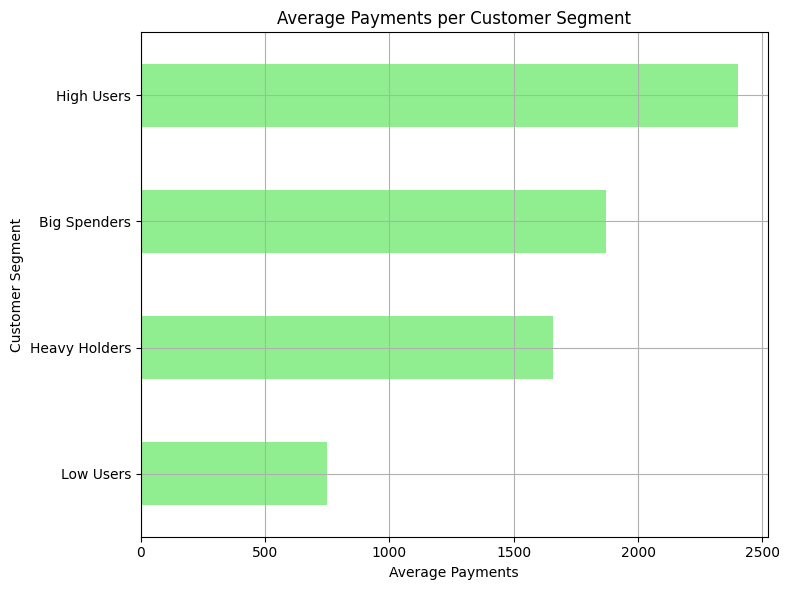

In [55]:
avg_payments_named = df.groupby('Cluster Name')['PAYMENTS'].mean().sort_values()

plt.figure(figsize=(8, 6))
avg_payments_named.plot(kind='barh', color='lightgreen')
plt.title('Average Payments per Customer Segment')
plt.xlabel('Average Payments')
plt.ylabel('Customer Segment')
plt.grid(True)
plt.tight_layout()
plt.show()

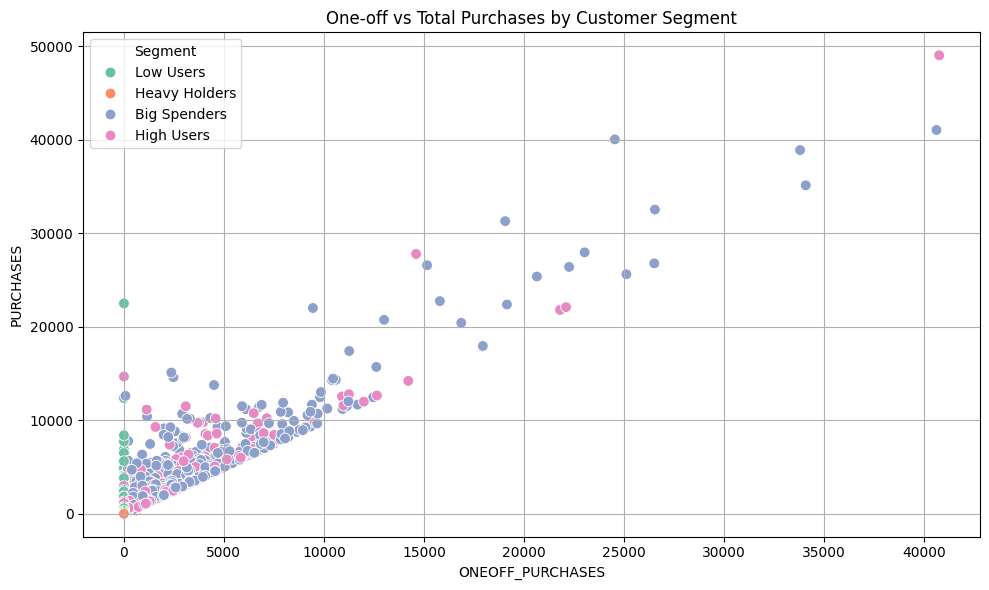

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='ONEOFF_PURCHASES',
    y='PURCHASES',
    hue='Cluster Name',
    palette='Set2',
    s=60
)
plt.title('One-off vs Total Purchases by Customer Segment')
plt.xlabel('ONEOFF_PURCHASES')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


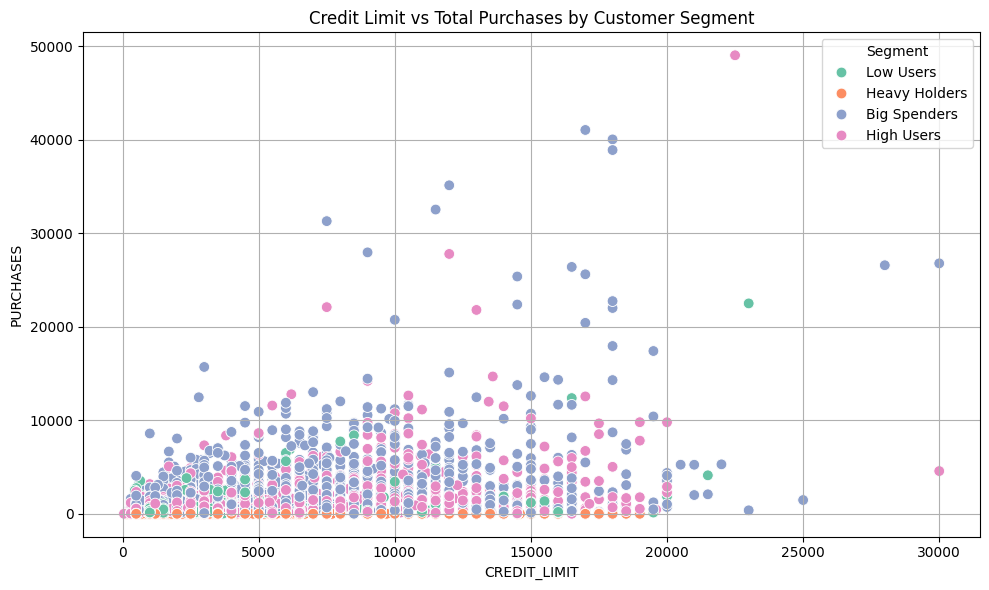

In [53]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='CREDIT_LIMIT',
    y='PURCHASES',
    hue='Cluster Name',
    palette='Set2',
    s=60
)
plt.title('Credit Limit vs Total Purchases by Customer Segment')
plt.xlabel('CREDIT_LIMIT')
plt.ylabel('PURCHASES')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


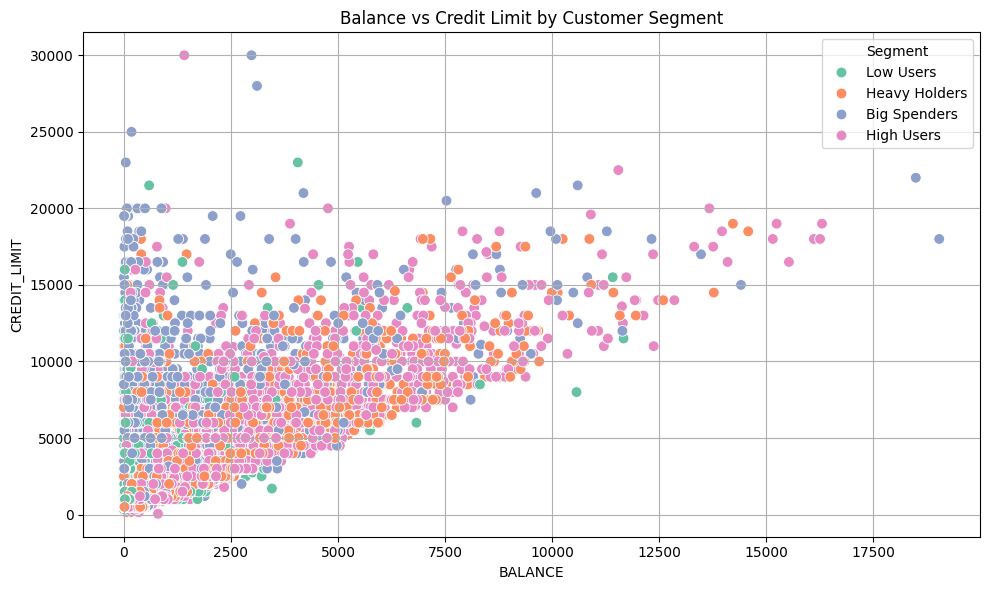

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='BALANCE',
    y='CREDIT_LIMIT',
    hue='Cluster Name',
    palette='Set2',
    s=60
)
plt.title('Balance vs Credit Limit by Customer Segment')
plt.xlabel('BALANCE')
plt.ylabel('CREDIT_LIMIT')
plt.grid(True)
plt.legend(title='Segment')
plt.tight_layout()
plt.show()


In [ ]:
!pip install dash

In [ ]:
!pip install chart-studio

In [61]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Step 1: Compute means per cluster name
features = ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
            'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'MINIMUM_PAYMENTS']

profile = df.groupby('Cluster Name')[features].mean().reset_index()

# Step 2: Melt for bar chart
profile_melt = profile.melt(id_vars='Cluster Name', var_name='Feature', value_name='Mean')

# Step 3: Bar plot
fig_bar = px.bar(
    profile_melt,
    x='Feature',
    y='Mean',
    color='Cluster Name',
    barmode='group',
    title='📊 Average Key Metrics by Cluster',
    width=950,
    height=500
)

fig_bar.update_layout(
    xaxis_tickangle=-45,
    legend_title_text='Cluster'
)

fig_bar.show()


In [70]:
# Step 4: Create pie charts per cluster
cols = 2
rows = (len(profile) + 1) // cols

fig_pies = make_subplots(
    rows=rows, cols=cols,
    specs=[[{'type': 'domain'}]*cols]*rows,
    subplot_titles=[f"{name}" for name in profile['Cluster Name']]
)

for i, row in profile.iterrows():
    cluster_name = row['Cluster Name']
    cluster_data = row.drop('Cluster Name')
    r, c = i // cols + 1, i % cols + 1

    # Set labels outside for Low Users, inside for others
    textpos = 'inside' if cluster_name == 'Low Users' else 'outside'

    fig_pies.add_trace(
        go.Pie(
            labels=cluster_data.index,
            values=cluster_data.values,
            name=cluster_name,
            textinfo='percent+label',
            textposition=textpos,
            automargin=True
        ),
        row=r,
        col=c
    )

fig_pies.update_layout(
    title_text="🥧 Feature Distribution per Cluster",
    height=400 * rows,
    width=950,
    showlegend=False
)

fig_pies.show()


In [77]:
import plotly.express as px
import pandas as pd

# Assuming you have your PCA 2D data in X_red and GMM labels in gmm_labels
# And the cluster_name_map dictionary you mentioned earlier

# Create DataFrame with PCA components and cluster labels
new_df = pd.DataFrame(X_red[:, :2], columns=['component_1', 'component_2'])
new_df['cluster_id'] = gmm_labels

# Map cluster IDs to names
cluster_name_map = {
    0: 'Low Users',
    1: 'High Users',
    2: 'Heavy Holders',
    3: 'Big Spenders'
}
new_df['Cluster Name'] = new_df['cluster_id'].map(cluster_name_map)

# Prepare cluster centers dataframe
import numpy as np
gmm_centers_2d = gmm.means_[:, :2]
centers_df = pd.DataFrame(gmm_centers_2d, columns=['component_1', 'component_2'])
centers_df['Cluster Name'] = [cluster_name_map[i] for i in range(len(gmm_centers_2d))]

# Define the order of categories to align colors
cluster_order = ['Low Users', 'High Users', 'Heavy Holders', 'Big Spenders']

# Plot interactive scatter plot with Plotly Express
fig = px.scatter(
    new_df,
    x='component_1',
    y='component_2',
    color='Cluster Name',
    category_orders={'Cluster Name': cluster_order},  # Ensures consistent color mapping
    color_discrete_sequence=px.colors.qualitative.Set2,
    title='GMM Clustering with Cluster Names (PCA 2D)',
    labels={'component_1': 'Component 1', 'component_2': 'Component 2'},
    hover_data=['cluster_id', 'Cluster Name']
)


fig.update_layout(
    legend_title_text='Cluster',
    width=900,
    height=600
)

fig.show()


In [64]:
pip install chart-studio

In [71]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls

# Set your credentials
chart_studio.tools.set_credentials_file(username='MohamedMohy', api_key='wW8tkwNfQYPUTsFZzZdw')


In [72]:
# Upload bar chart
upload_url_bar = py.plot(fig_bar, filename='average_key_metrics_by_cluster', auto_open=True)
print(f"Bar chart uploaded: {upload_url_bar}")

# Upload pie charts
upload_url_pies = py.plot(fig_pies, filename='feature_distribution_per_cluster', auto_open=True)
print(f"Pie charts uploaded: {upload_url_pies}")


Bar chart uploaded: https://chart-studio.plotly.com/~MohamedMohy/1/
Pie charts uploaded: https://chart-studio.plotly.com/~MohamedMohy/3/
